# SOCIAL MEDIA ADDICTION ANALYSIS AMONG UNIVERSITY STUDENTS

## Problem Statement

**How can universities detect and reduce the academic fallout of social media addiction among students using behavioral and usage data?**

Let’s face it- the scroll never sleeps. Across campuses, students are spending endless hours glued to their screens- often sacrificing academic performance, mental wellness, and sleep along the way. This project dives deep into the digital undercurrents of student life, aiming to uncover risky patterns early and equip universities with the tools to do something about it.

## Project Goals

This isn’t just about crunching numbers. It’s about equipping real people- support staff, counselors, policy shapers — with data that talks, warns, and ultimately helps:

- Identify students silently slipping into digital overuse or addiction  
- Uncover the behavioral and mental patterns most tied to academic struggles  
- Drive timely interventions that protect both grades and growth

## Key Stakeholders

- University Administrators & Deans  
- Student Wellness & Counseling Centers  
- Academic Policy Committees  
- EdTech & Learning Analytics Startups  

Because everyone on this list has something at stake- and something to gain.

## Analytics Objectives

1. **Classification Task**  
   Predict whether a student is addicted to social media- and how deep the rabbit hole goes.

2. **Impact Modeling**  
   Gauge how online behaviors, mental health, and sleep quality shape academic performance.

3. **Clustering Task**  
   Sort students into behavioral tribes- because one-size-fits-all doesn’t cut it.

4. **Exploratory Data Analysis (EDA)**  
   - Uncover the biggest digital red flags behind academic or mental health decline  
   - Break down usage patterns by gender, platform, and time spent online  

## Success Metrics

We’re not just building models for show- we want results that stick:

**Model Performance**
- Accuracy ≥ 90%  
- F1 Score ≥ 0.95 (especially where it counts- detecting addiction)  
- ROC AUC Score ≥ 0.95 for academic impact predictions  

**Insight Value**
- At least 5 red-flag behavioral indicators uncovered  
- Clear, actionable clustering into 3–5 behavioral personas  

**Deployment Readiness**
- Working prototype or dashboard concept  
- Drafted data-backed policy or intervention framework  

**Stakeholder Utility**
- Qualitative feedback from at least 1 counselor or academic team  
- Simulated test case run on anonymized student data  

## Potential Applications

- *Early alert systems* to catch students before burnout hits  
- *LMS integration* that doesn't just track grades- but behaviors  
- *Digital wellness dashboards* for student self-checks  
- *Policy insights* that go beyond screen-time shaming and into real support  

This isn’t just a dataset. It’s a lens into how students live, learn, and (sometimes) spiral online- and a blueprint for helping them bounce back.

## INITIAL DATA EXPLORATION (IDE)

Every dataset tells a story- but before I dive into any narratives, I'll flip through the table of contents. This phase is about getting comfortable with the data: seeing what’s there, what’s missing, and what might surprise me later if I don’t pay attention now.

#### What's happening:
- Importing key libraries like 'pandas', 'numpy', 'seaborn', 'matplotlib', and 'plotly'- the usual suspects for slicing, dicing and visualizing data.
- Previewing the first few rows to get a feel for the dataset’s structure, naming conventions, and early red flags (no one likes nasty surprises 30 cells in).
- Checking the shape of the data because whether it's 500 rows or 50,000 completely changes the game.
- Get metadata
- Get basic statistics information of both numerica and categorical columns

This might not be the flashiest part of the workflow, but it’s where trust is built- between me and the dataset. And as I’ve learned from previous projects, a few extra minutes spent here can save hours of confusion down the road.

Exploration done right is part instinct, part structure- this is BOTH!

In [567]:
# Mathematical computation and data manipulation libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Modeling and ML libraries
from sklearn.preprocessing import LabelEncoder

# Load the data
student_df = pd.read_csv('Students Social Media Addiction.csv')

# Preview first 5
student_df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [568]:
# Check how many rows and columns I am working with
print(f'The dataset has {student_df.shape[0]} rows and {student_df.shape[1]} columns')

# Check column names to inform on standardisation needs
print('\nColumn Names:\n', student_df.columns)

The dataset has 705 rows and 13 columns

Column Names:
 Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')


In [569]:
# Standardise column names
student_df.columns = (student_df.columns.str.strip().str.lower())

# Preview changes
student_df.sample(4)

,student_id,age,gender,academic_level,country,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score
681,682,22,Male,Graduate,Canada,5.8,TikTok,Yes,6.6,6,Single,3,7
590,591,19,Female,Undergraduate,India,7.0,Instagram,Yes,5.8,4,Single,5,9
493,494,21,Male,Graduate,India,7.5,WhatsApp,Yes,4.8,5,In Relationship,4,8
484,485,19,Female,Undergraduate,Switzerland,2.3,Instagram,No,9.5,8,Single,2,4


In [570]:
# Get metadata
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    705 non-null    int64  
 1   age                           705 non-null    int64  
 2   gender                        705 non-null    object 
 3   academic_level                705 non-null    object 
 4   country                       705 non-null    object 
 5   avg_daily_usage_hours         705 non-null    float64
 6   most_used_platform            705 non-null    object 
 7   affects_academic_performance  705 non-null    object 
 8   sleep_hours_per_night         705 non-null    float64
 9   mental_health_score           705 non-null    int64  
 10  relationship_status           705 non-null    object 
 11  conflicts_over_social_media   705 non-null    int64  
 12  addicted_score                705 non-null    int64  
dtypes: fl

In [571]:
# Get basic statistical info of numerical variables
student_df.describe()

,student_id,age,avg_daily_usage_hours,sleep_hours_per_night,mental_health_score,conflicts_over_social_media,addicted_score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [572]:
# Get basic statistical info of categorical variables
student_df.describe(include = 'O').T

,count,unique,top,freq
gender,705,2,Female,353
academic_level,705,3,Undergraduate,353
country,705,110,India,53
most_used_platform,705,12,Instagram,249
affects_academic_performance,705,2,Yes,453
relationship_status,705,3,Single,384


In [573]:
# Check for duplicattes and nulls
print('Duplicates:', student_df.duplicated().sum())
print('\nNull Values:\n', student_df.isna().sum())

Duplicates: 0

Null Values:
 student_id                      0
age                             0
gender                          0
academic_level                  0
country                         0
avg_daily_usage_hours           0
most_used_platform              0
affects_academic_performance    0
sleep_hours_per_night           0
mental_health_score             0
relationship_status             0
conflicts_over_social_media     0
addicted_score                  0
dtype: int64


# DATA UNDERSTANDING

Before diving deep into analysis, it's crucial to understand the landscape of the dataset- its structure, health, and what the raw numbers are whispering beneath the surface.

### Dataset Snapshot

The dataset comprises **705 student records**, each detailing social media habits, academic status, and mental health indicators. The data is clean and structured- no null values, no duplicate records. A solid foundation to build insights on.

### Data Integrity

**Duplicates:** 0- Each entry is unique.

**Null Values:** None- All fields are complete.

This means no immediate data wrangling is needed- we can proceed straight to meaningful exploration.

### Categorical Features

| Feature | Unique Values | Most Frequent | Frequency |
|---------|----------------|----------------|-----------|
| 'gender' | 2 | Female | 353 |
| 'academic_level' | 3 | Undergraduate | 353 |
| 'country' | 110 | India | 53 |
| 'most_used_platform' | 12 | Instagram | 249 |
| 'affects_academic_performance' | 2 | Yes | 453 |
| 'relationship_status' | 3 | Single | 384 |

**Observation:**  
- The dataset skews slightly towards **female students** and **undergraduates**.  
- **Instagram** dominates as the most-used platform, hinting at a potential hotspot for behavioral patterns.  
- A majority acknowledge that social media affects their academic performance.

### Numerical Features (Summary Statistics)

| Feature | Mean | Std | Min | 25% | 50% | 75% | Max |
|---------|------|-----|-----|-----|-----|-----|-----|
| 'age' | 20.66 | 1.40 | 18 | 19 | 21 | 22 | 24 |
| 'avg_daily_usage_hours' | 4.92 | 1.26 | 1.5 | 4.1 | 4.8 | 5.8 | 8.5 |
| 'sleep_hours_per_night' | 6.87 | 1.13 | 3.8 | 6.0 | 6.9 | 7.7 | 9.6 |
| 'mental_health_score' | 6.23 | 1.11 | 4 | 5 | 6 | 7 | 9 |
| 'conflicts_over_social_media' | 2.85 | 0.96 | 0 | 2 | 3 | 4 | 5 |
| 'addicted_score' | 6.44 | 1.59 | 2 | 5 | 7 | 8 | 9 |

**Observation Highlights:**
- On average, students spend just under **5 hours daily** on social media- nearly a part-time job.
- Most students report getting **~7 hours of sleep**, but there's a low-end outlier at 3.8 hours.
- **Mental health scores** lean toward moderate to good (mean ≈ 6.2 out of 10), but deeper analysis may reveal platform or usage correlations.
- **Addiction scores** show notable variation- an area worth visualizing across academic levels or usage time.

### Early Insight Teasers

- Heavy Instagram usage and high average screen time could signal burnout or academic pressure.
- Students reporting more social media conflicts tend to rate higher on the addiction scale.
- Relationship status might have an influence on both usage and mental health metrics. Are lonely hearts coping with memes or melting- a juicy angle for later  

Next step? Let’s dive into **exploratory data analysis** and uncover the patterns hiding in plain sight.

Grab your matcha, your mouse, and your mental map- this rabbit hole’s about to get interesting.

# EXPLORATORY DATA ANALYSIS (EDA)

Time to lift the hood.

EDA is where the dataset stops being "just numbers" and starts telling *its story*. Patterns start peeking through. Outliers try to hide. Trends? They whisper- if you’re paying attention.

We're not just plotting for aesthetics- we’re here to ask:
- Who’s using what?
- How deep is the scroll?
- Is Instagram just a time-killer, or a mental health landmine?
- Do students sleeping less also feel worse?
- And does being single = more screen time?

This is the stage where the **"what"** meets the **"why."**  


But first...


## Feature Engineering

The average age floats around 20.6, but raw age alone doesn’t always tell us much- especially when we're looking for *group-level behavior*. 

So, we'll slice age into meaningful buckets (age-group):

- **18–19**: Freshmen & early college energy.
- **20–21**: Mid-academia hustle- balancing dreams, deadlines, and DMs.
- **22–24**: Final stretch- prepping for life after school (or just more school).

This makes it easier to compare behavior across stages- think: Does social media hit different when you're just starting uni vs. when you’re about to finish?

Let's create that new feature: 'age_group'.

In [574]:
# Define function to bucket age
def age_group(age):
    if 16 <= age <= 19:
        return '16-19'
    elif 20 <= age <= 22:
        return '20-22'
    elif 23 <= age <= 25:
        return '23-25'
    else:
        return 'Other'

# Apply function to create new column
student_df['age_group'] = student_df['age'].apply(age_group)

# Preview changes
student_df['age_group'].value_counts()

20-22    468
16-19    177
23-25     60
Name: age_group, dtype: int64

## Outlier Detection: 

Before we start trusting averages and plotting trends, we gotta check:  
Which values are legit... and which are just statistical noise?

We’ll focus on the **numerical columns**:

- 'age'  
- 'avg_daily_usage_hours'  
- 'sleep_hours_per_night'  
- 'mental_health_score'  
- 'conflicts_over_social_media'  
- 'addicted_score'

We’ll use **IQR (Interquartile Range) method** — a solid way to catch outliers without assuming normality. Here's how it goes:

- Anything below **Q1 - 1.5 × IQR** or above **Q3 + 1.5 × IQR** gets flagged.
- But context matters — not every "outlier" is bad. Some are just real people with chaotic routines.

We’ll plot them too- boxplotsto *see* where the edge cases lie.

Because sometimes, the outliers aren’t errors- they’re the story.

In [575]:
# List of numerical columns to check
num_cols = [
    'age',
    'avg_daily_usage_hours',
    'sleep_hours_per_night',
    'mental_health_score',
    'conflicts_over_social_media',
    'addicted_score'
]

# Create a DataFrame to flag outliers
outlier_summary = {}

for col in num_cols:
    Q1 = student_df[col].quantile(0.25)
    Q3 = student_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = student_df[(student_df[col] < lower_bound) | (student_df[col] > upper_bound)]
    
    outlier_summary[col] = {
        'count': len(outliers),
        'percent': round((len(outliers) / len(student_df)) * 100, 2),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

# Convert summary to a DataFrame
outlier_df = pd.DataFrame(outlier_summary).T
outlier_df


,count,percent,lower_bound,upper_bound
age,0.0,0.00,14.50,26.50
avg_daily_usage_hours,3.0,0.43,1.55,8.35
sleep_hours_per_night,0.0,0.00,3.45,10.25
mental_health_score,0.0,0.00,2.00,10.00
conflicts_over_social_media,0.0,0.00,-1.00,7.00
addicted_score,0.0,0.00,0.50,12.50


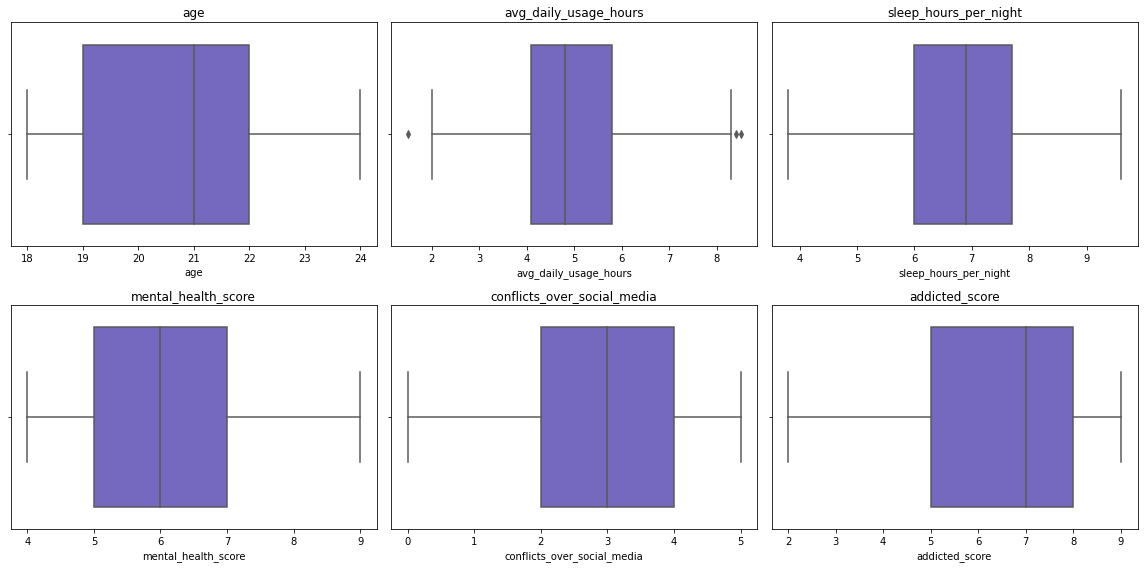

In [576]:
# Visualise outliers
plt.figure(figsize = (16, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x = student_df[col], color = '#6a5acd')
    plt.title(f'{col}')
    plt.tight_layout()

**Key Takeaway:**  
Only **'avg_daily_usage_hours'** shows a slight presence of outliers- just 3 students (0.43%) who are likely heavy social media users (probably TikTok warriors or meme page admins). The rest of the numerical fields are **clean and within range**, so we can proceed without needing to cap or remove any values.

We’ll keep those 3 usage-hour outliers in for now — they’re *real behavior*, not data errors.

# UNIVARIATE ANALYSIS

Before we start connecting dots and drawing conclusions, we need to understand each feature on its own- no distractions, no correlations, just the raw behavior of the variables.

This phase is about asking:  
- What’s the shape of our data?
- Are values clustered, skewed, or flatlined?
- Who’s dominating the scene in each category?

We’ll break it down:
- **Categorical variables**- using bar plots to spot the loudest voices.
- **Numerical variables**- histograms and distributions.

This isn’t just a stats check- it’s the part where we get familiar with the cast before analyzing the plot.

Let’s meet the features.

## 1. Age Group

Age is more than just a number- it’s a behavioral compass. In this context, it helps us decode maturity levels, digital tendencies, and academic resilience. Whether it’s a 19-year-old riding the algorithm wave on TikTok or a 24-year-old balancing coursework with real-world responsibilities, age gives us context that raw numbers can’t.

In this analysis, we’ve grouped students into distinct **age bands** to make patterns easier to spot- because let’s face it, analyzing a swarm of floating integers isn’t anyone’s idea of clarity. These bins aren’t arbitrary; they reflect real transitions in lifestyle, motivation, and digital consumption.

So before we start connecting dots between screen time and sleep cycles, let’s answer a simple question:  
**Who’s actually in this data?**

In [577]:
# Get and display the value counts for age groups
age_group_summary = (student_df['age_group']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'age_group', 'age_group': 'count'})
    .sort_values('age_group')
)

# Display summary before plotting
print('Age Group Counts:\n', age_group_summary)

# Create bar plot
fig = px.bar(
    age_group_summary, 
    x = 'age_group', 
    y = 'count',
    color = 'age_group',
    title = 'Distribution of Age Groups',
    text = 'count',
    color_discrete_sequence = ['#4B0082', '#6A5ACD', '#8A2BE2']
)

fig.update_layout(
    font = dict(family = 'Lato', size = 14, color = 'black'),

    xaxis_title = 'Age Group',
    yaxis_title = 'Number of Students',
    showlegend = False
)

fig.show()

Age Group Counts:
   age_group  count
1     16-19    177
0     20-22    468
2     23-25     60


>- **20–22 years** dominates the cohort, representing **~66%** of the sample (468 students).
>- **16–19 years** follow at **~25%** (177 students).
>- Only **~9%** (60 students) fall within the **23–25 years** bracket.

>**Observation:** This age distribution suggests that the majority of respondents are likely in the **early stages of undergraduate studies**, a critical developmental window where digital behavior and academic performance are often most sensitive to environmental and psychological factors.

>The **underrepresentation of older students (23–25)** may either reflect the typical age distribution of the academic institution or indicate reduced survey engagement from upperclassmen or non-traditional students.

## 2. Gender
Before diving into behavior patterns, it's important to know who’s at the table- in this case, we’re looking at gender distribution.

Why does gender matter here? Because digital behavior isn't one-size-fits-all. From platform preferences to average screen time, gender can subtly- or not so subtly- influence how students engage with technology, how they cope, and how they learn.

In this dataset, gender is reported as **Male** or **Female**, and while it might seem like a basic demographic checkbox, it often turns out to be one of the most telling factors in understanding mental health patterns, academic pressures, and even social media conflicts.

So, let’s break it down: what’s the gender balance among our students? And more importantly, what might that mean for how we interpret their digital lives?

In [578]:
# Get and display the value counts for gender
gender_summary = (student_df['gender'].value_counts().reset_index().rename(columns={'index': 'gender', 'gender': 'count'}).sort_values('gender'))

# Display summary before plotting
print('Gender Counts:\n', gender_summary)

# Create bar plot
fig = px.bar(gender_summary, x = 'gender', y = 'count',
    color = 'gender',
    title = 'Distribution of Gender',
    text = 'count',
    color_discrete_sequence = ['#FFA07A', '#6A5ACD']
)

fig.update_layout(
    font = dict(family = 'Lato', size = 14, color = 'black'),
    xaxis_title = 'Gender',
    yaxis_title = 'Number of Students',
    showlegend = False
)

fig.show()

Gender Counts:
    gender  count
0  Female    353
1    Male    352


> The gender breakdown of the 705 students in the dataset is nearly perfectly balanced:

> - **Female students**: 353 (**50.1%**)
> - **Male students**: 352 (**49.9%**)

>**Observation:** This remarkably even split offers a **valuable foundation for unbiased comparative analysis** across gender. Whether examining academic performance, social media usage, or mental health indicators, this balance ensures that observed differences are less likely to be the result of sample imbalance and more reflective of genuine behavioral or experiential variation.

>**Implication:** Analyses stratified by gender (e.g addiction score, conflict frequency, or academic impact) can be conducted with strong statistical integrity and minimal need for sample weighting.


## 3. Academic Level
Let’s talk credentials- not ours, but the academic level of the students in this dataset.

Understanding whether a student is in high school, undergrad, or grad school isn’t just semantics- it frames everything from stress levels to social media behavior. A high schooler procrastinating on TikTok is very different from a grad student "doom-researching" on LinkedIn.

Academic level also gives us insight into maturity, digital responsibility, and possibly how close someone is to deleting Instagram and becoming a full-time Notion user.

Let’s see which educational stages dominate this dataset.

In [579]:
# Define the correct academic level order (ascending)
level_order = ['High School', 'Graduate', 'Undergraduate']

# Get and display the value counts for academic level
academic_lvl_summary = (
    student_df['academic_level']
    .value_counts()
    .reset_index()
    .rename(columns = {'index': 'academic_level', 'academic_level': 'count'})
)

# Apply the custom category order
academic_lvl_summary['academic_level'] = pd.Categorical(
    academic_lvl_summary['academic_level'],
    categories = level_order,
    ordered = True
)

# Sort by the ordered category
academic_lvl_summary = academic_lvl_summary.sort_values('academic_level')

# Display summary before plotting
print('Academic Level Counts:\n', academic_lvl_summary)

# Create bar plot 
fig = px.bar(academic_lvl_summary, x = 'academic_level', y = 'count',
    color = 'academic_level',
    title = 'Distribution of Academic Levels',
    text = 'count',
    color_discrete_sequence = ['#A8D5BA', '#56B4D3', '#482878']
)

# Update layout
fig.update_layout(
    font = dict(family = 'Lato', size = 14, color = 'black'),
    xaxis_title = 'Academic Level',
    yaxis_title = 'Number of Students',
    showlegend = False
)

fig.show()

Academic Level Counts:
   academic_level  count
2    High School     27
1       Graduate    325
0  Undergraduate    353


>The student population in this dataset is composed of three academic levels:

> - **Undergraduates**: 353 students (**50.1%**)
> - **Graduates**: 325 students (**46.1%**)
> - **High School students**: 27 students (**3.8%**)

> **Observation:** This distribution shows a **heavy concentration in higher education**, with **undergraduates and graduates comprising over 96%** of the dataset. The small number of high school students suggests limited representation of pre-university learners, which may affect the generalizability of certain findings to younger age groups.

> **Implication:** Analytical focus should primarily target behaviors and patterns among **university-level students**, as their dominant presence drives most of the insights. However, high school responses, while limited, can still provide early signals worth exploring in targeted comparisons.

## 4. Country
Where are these students actually from?

The dataset spans dozens of countries- which means behavior is shaped not just by age and academic stress, but by **culture, connectivity, and even platform popularity**. TikTok might reign in one country while Facebook refuses to die in another.

Understanding the **top contributing countries** helps frame digital behavior through a global lens- because context is everything, and the internet may be universal, but how we use it? Not even close.

Let’s map this out.

In [580]:
# Get and display the top 20 countries by student count
country_counts = (student_df['country'].value_counts().reset_index().rename(columns = {'index': 'country', 'country': 'count'}).head(20))

print("Top 20 Countries by Student Count:\n", country_counts)

# Create enhanced treemap
fig = px.treemap(country_counts, path = ['country'], values = 'count', 
    title = 'Country Distribution – Top 20',
    color = 'count',
    color_continuous_scale = 'Aggrnyl',
)

# Styling
fig.update_layout(
    font = dict(family = 'Lato', size = 14, color = 'black'),
    margin = dict(t = 60, l = 20, r = 20, b = 20),
    paper_bgcolor = 'white',
    plot_bgcolor = 'white'
)

# Formatting
fig.data[0].texttemplate = "%{label}<br>👥 %{value} students"

fig.show()

Top 20 Countries by Student Count:
         country  count
0         India     53
1           USA     40
2        Canada     34
3        France     27
4        Mexico     27
5       Ireland     27
6        Turkey     27
7   Switzerland     27
8       Denmark     27
9         Spain     27
10           UK     22
11        Italy     21
12        Japan     21
13       Russia     21
14   Bangladesh     20
15    Sri Lanka     19
16        Nepal     19
17     Maldives     19
18     Pakistan     19
19       Poland     16


> The dataset features students from **over 100 countries**, reflecting a rich global diversity. Here are the top 20 countries by student count:
> - **India leads** with 53 students, followed by:
> - **USA** (40), **Canada** (34), and a cluster of countries (e.g Mexico, France, Switzerland, Denmark, Turkey, Spain, and Ireland) all with **~27 students** each.
> - Several other countries (e.g., UK, Italy, Japan, Russia) show moderate representation between 20–22 students.

> **Observation:** This long-tailed distribution suggests a dataset that, while diverse, is somewhat skewed toward a few countries with higher student engagement or availability. Cultural context, academic pressure, digital infrastructure, and platform accessibility may differ significantly across these regions — something to keep in mind when interpreting cross-country behaviors.

>**Implication:** Cross-national comparisons (e.g platform preference, addiction scores, mental health trends) should account for uneven sample sizes. For robust comparative insights, focus on countries with ≥20 participants to ensure statistical relevance.

## 5. Average daily social media usage in hours
Here’s the million-scroll question: **How many hours a day are students glued to social media?**

Spoiler alert: it’s… a lot.

This variable tells us how deep we are into the attention economy- whether we’re looking at casual scrollers, committed content zombies, or folks who need a Screen Time intervention. It’s the behavioral backbone of this dataset and a potential predictor of everything from sleep disruption to academic slippage.

Let’s break down how long students are actually staying online- and who might be one notification away from burnout.

In [581]:
# Define bins and labels
bins = [0, 2, 4, 6, 8, 10]
labels = ['0–2 hrs', '2–4 hrs', '4–6 hrs', '6–8 hrs', '8–10 hrs']

# Bin the usage hours
student_df['usage_bin'] = pd.cut(student_df['avg_daily_usage_hours'], bins = bins, labels = labels, right = False)

# Get value counts of binned usage
usage_counts_binned = student_df['usage_bin'].value_counts().sort_index()

# Print the binned value counts
print("Average Daily Usage:\n", usage_counts_binned)

# Plot figure
fig = px.histogram(student_df, x = 'avg_daily_usage_hours',
    nbins = 30,
    title = 'Distribution of Average Daily Social Media Usage',
    color_discrete_sequence = ['#6A5ACD']
)

fig.update_layout(
    xaxis_title = 'Avg Daily Usage (Hours)',
    yaxis_title = 'Number of Students',
    font = dict(family = 'Lato, sans-serif')
)

fig.show()

Average Daily Usage:
 0–2 hrs       1
2–4 hrs     153
4–6 hrs     401
6–8 hrs     144
8–10 hrs      6
Name: usage_bin, dtype: int64


> Binning average daily usage hours reveals a **heavily concentrated pattern of engagement** among students:
> - **4–6 hours/day**: 401 students (**~57%**)  
> - **2–4 hours/day**: 153 students (**~22%**)  
> - **6–8 hours/day**: 144 students (**~20%**)  
> - Outliers include:
    - **8–10 hours/day**: 6 students
    - **0–2 hours/day**: just 1 student

> **Observation:** This distribution shows that **over 77% of students spend 4–8 hours daily** on social media- a level of engagement that borders on habitual and potentially impacts academic and cognitive performance. Minimal representation at the extremes (especially the <2 hr group) suggests that **low social media exposure is rare** among the cohort.

>**Implication:** Any analyses relating to addiction, academic disruption, or mental health should treat the 4–8 hour band as the behavioral norm- and deviations from it as potentially meaningful outliers.

## 6. Most used platform
Everyone has their digital poison- and this variable tells us what the students are sipping on.

From Instagram reels to TikTok spirals, platform preference isn’t just about trends- it’s a **behavioral fingerprint**. It shows what kind of content students consume, how they engage, and possibly what keeps them up at 2am when they swore they’d just check one notification.

So which apps reign supreme among this cohort?

In [582]:
# Get and display the value counts
platform_counts = (student_df['most_used_platform'].value_counts().reset_index().rename(columns = {'index': 'Platform', 'most_used_platform': 'Count'}))

print("Most Used Platforms:\n", platform_counts)

# Define brand colors
platform_colors = {
    'Instagram': '#E1306C',
    'WhatsApp': '#25D366',
    'Facebook': '#1877F2',
    'Twitter': '#000000',
    'TikTok': '#010101',
    'Snapchat': '#FFFC00',
    'Telegram': '#0088CC',
    'YouTube': '#FF0000',
    'Discord': '#7289DA',
    'LinkedIn': '#0077B5'
}

# Plot figure
fig = px.bar(platform_counts.sort_values('Count'), x = 'Count', y = 'Platform', orientation = 'h',
    text = 'Count',
    color = 'Platform',
    color_discrete_map = platform_colors,
    title = 'Most Used Social Media Platforms (Branded)'
)

# Styling
fig.update_layout(
    font = dict(family = 'Lato', size = 14),
    xaxis_title = 'Number of Students',
    yaxis_title = 'Platform',
    showlegend = False
)

fig.show()

Most Used Platforms:
      Platform  Count
0   Instagram    249
1      TikTok    154
2    Facebook    123
3    WhatsApp     54
4     Twitter     30
5    LinkedIn     21
6      WeChat     15
7    Snapchat     13
8   KakaoTalk     12
9        LINE     12
10  VKontakte     12
11    YouTube     10


> The data reveals a **clear dominance of visually-driven and mobile-first platforms** among students:
>- **Instagram** tops the list with **249 users (~35%)**
>- Followed by **TikTok** (154) and **Facebook** (123), completing the top 3
>- Messaging apps like **WhatsApp** (54) and **Twitter** (30) follow, but at a much lower scale
>- Niche platforms such as **LinkedIn, WeChat, Snapchat, VKontakte, LINE, KakaoTalk, and YouTube** round out the list, each with under 25 users

>**Obseervation:** This platform preference landscape reflects a **youth-centric digital culture**, where image-based interaction and algorithm-curated content dominate attention spans. Notably, **professional or productivity-oriented platforms (e.g., LinkedIn, YouTube)** are underrepresented, suggesting that **social use far outweighs academic or career utility** in student media consumption.

>**Implication:** When evaluating metrics like addiction scores or academic impact, platforms like **Instagram and TikTok** should be closely examined as potential behavioral drivers. Their design mechanics (e.g infinite scroll, short-form video, algorithmic dopamine loops) may contribute more significantly to attention fragmentation and compulsive use.


## 7. Affects Academic Performance
This is where perception meets performance. Students were asked a simple yet loaded question:  
**“Do you think social media affects your academic performance?”**

Now, they’re not handing over GPAs here- just gut feelings. But gut feelings matter.

This variable gives us a candid glimpse into self-awareness, potential tech regret, and whether students feel in control- or at the mercy- of their devices.

Let’s break it down and see how many believe their grades are scrolling with them.

In [583]:
# Value counts
performance_counts = (
    student_df['affects_academic_performance']
    .value_counts()
    .reset_index()
    .rename(columns = {'index': 'Response', 'affects_academic_performance': 'Count'})
)

print("Affects Academic Performance:\n", performance_counts)

# Donut Chart
fig = px.pie(performance_counts, names = 'Response', values = 'Count',
    title = 'Impact of Social Media on Academic Performance',
    hole = 0.6,  # makes pie chart into a donut
    color = 'Response',
    color_discrete_map = {
        'Yes': '#E74C3C',
        'No': '#2ECC71'
    }
)

fig.update_traces(textinfo = 'percent+label')

fig.update_layout(
    font = dict(family = 'Lato, sans-serif'),
    showlegend = True
)

fig.show()

Affects Academic Performance:
   Response  Count
0      Yes    453
1       No    252


> When asked whether social media usage affects their academic performance:
>- **453 students (64.3%)** responded **"Yes"**
> - **252 students (35.7%)** said **"No"**

> **Observation:** This indicates a strong **self-reported correlation between social media engagement and academic disruption**. While perception doesn't always align with measurable academic outcomes, the high "Yes" rate is significant- suggesting that students themselves are aware of potential negative trade-offs in focus, time management, or mental load.

>**Implication:** This variable should be treated as a key target or stratification factor in deeper analyses. Cross-analyzing this with metrics like 'avg_daily_usage_hours', 'addicted_score', and 'mental_health_score' may reveal whether perception matches behavioral reality- or if there’s a disconnect between awareness and action.

## 8. Hours of sleep per night
Sleep- the unsung hero of student success, and often the first thing sacrificed in the name of "just one more scroll."

This variable tells us how much rest students are getting each night. And when we say "rest," we mean actual REM sleep- not background TikTok while lying in bed with one eye closed.

Sleep is deeply tied to **mental health**, **academic performance**, and overall life balance. So let’s analyze how many students are getting their 8 hours… and how many are rolling through college on caffeine and vibes.

In [584]:
# Define bins and labels for easier interpretation
bins = [0, 4, 6, 8, 10, 12]
labels = ['<4 hrs', '4–6 hrs', '6–8 hrs', '8–10 hrs', '10–12 hrs']
student_df['sleep_bin'] = pd.cut(student_df['sleep_hours_per_night'],
    bins = bins,
    labels = labels,
    right = False
)

# Print value counts for the bins
sleep_bin_counts = student_df['sleep_bin'].value_counts().sort_index()

print("Hours of Sleep per Night:\n", sleep_bin_counts)

# Plot figure
fig = ff.create_distplot(
    [student_df['sleep_hours_per_night']],
    group_labels = [''], # Hide group label from legend
    colors = ['#3498DB'],
    show_hist = True,
    show_rug = False
)

# Styling
fig.update_layout(
    title = 'Distribution of Sleep Hours Per Night',
    xaxis_title = 'Hours of Sleep',
    yaxis_title = 'Density',
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = 'white',
    showlegend = False 
)

fig.show()

Hours of Sleep per Night:
 <4 hrs         2
4–6 hrs      165
6–8 hrs      407
8–10 hrs     131
10–12 hrs      0
Name: sleep_bin, dtype: int64


> After binning the students’ reported sleep duration into interpretable ranges, the distribution reveals:
>- **6–8 hours/night** is the most common range, covering **407 students (~58%)** — within the healthy adult recommendation.
>- **4–6 hours** is the next most frequent, with **165 students (~23%)**, indicating a substantial group experiencing mild sleep deprivation.
>- **8–10 hours**, reported by **131 students (~19%)**, likely includes individuals with more flexible routines or stronger personal time management.
>- Only **2 students (<1%)** sleep less than 4 hours — an extreme that warrants attention if paired with high digital use or mental health strain.

>**Implication:**  While most students report **adequate sleep**, nearly **a quarter are at risk of under-sleeping**, which could negatively impact academic performance, mental clarity, and emotional stability. This variable should be explored further in relation to 'avg_daily_usage_hours' and 'mental_health_score' to evaluate whether **digital behavior is crowding out recovery time**.

## 9. Mental health score
Mental health isn’t a sidebar in education anymore- it’s front and center. And in this dataset, students gave us a number representing how they’re feeling, mentally and emotionally.

Now, it’s self-reported, sure- but it still paints a picture. From stress and burnout to calm and collected, this score offers insight into the inner state of students navigating deadlines, digital overload, and 24/7 connectivity.

Let’s see where students fall on the mental health scale— and where we should start paying closer attention.

In [585]:
# Get value counts
student_df['mental_health_score_rounded'] = student_df['mental_health_score'].round()
mh_counts = student_df['mental_health_score_rounded'].value_counts().sort_index()

print("Mental Health Score - Rounded Value Counts:\n", mh_counts)

# Extract KDE using seaborn
fig_kde, ax_kde = plt.subplots()
sns.kdeplot(student_df['mental_health_score'], bw_adjust = 0.5, ax = ax_kde)
kde_line = ax_kde.lines[0]
x_vals = kde_line.get_xdata()
y_vals = kde_line.get_ydata()
plt.close(fig_kde)

# Scale KDE to match histogram
y_scaled = y_vals * len(student_df) * (student_df['mental_health_score'].max() - student_df['mental_health_score'].min()) / 10

# Find mode of the KDE (highest peak)
peak_index = np.argmax(y_scaled)
peak_x = x_vals[peak_index]
peak_y = y_scaled[peak_index]

# Create figure
fig = go.Figure()

# Histogram
fig.add_trace(go.Histogram(
    x = student_df['mental_health_score'],
    nbinsx = 10,
    name='Students',
    marker_color = '#A569BD',
    opacity = 0.7,
    hovertemplate = 'Score Range: %{x}<br>Students: %{y}<extra></extra>'
))

# KDE Curve
fig.add_trace(go.Scatter(
    x = x_vals,
    y = y_scaled,
    mode = 'lines',
    name = 'KDE Curve',
    line = dict(color = '#7D3C98', width = 3),
    hovertemplate = 'Score: %{x:.2f}<br>Estimated: %{y:.0f} students<extra></extra>'
))

# Add shaded area for scores < 4
fig.add_shape(
    type = "rect",
    x0 = 1, x1 = 4,
    y0 = 0, y1 = max(y_scaled)*1.05,
    fillcolor = "#FADBD8",  
    opacity = 0.3,
    line_width = 0,
    layer = "below"
)

fig.add_annotation(
    x = 2.5,
    y = max(y_scaled)*0.95,
    text = "At-Risk Zone (Score < 4)",
    showarrow = False,
    font = dict(color = "red", size = 12)
)

# Annotate KDE peak
fig.add_annotation(
    x = peak_x,
    y = peak_y,
    text = f"Mode: {peak_x:.1f}",
    showarrow = True,
    arrowhead = 2,
    ax = 0,
    ay = -40,
    font = dict(color = "black"),
    bgcolor = "white"
)

# Final layout
fig.update_layout(
    title = 'Distribution of Mental Health Scores',
    xaxis_title = 'Mental Health Score (1–10)',
    yaxis_title = 'Number of Students',
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = 'white',
    showlegend = True,
    bargap = 0.05
)

fig.show()

Mental Health Score - Rounded Value Counts:
 4     29
5    173
6    219
7    178
8    105
9      1
Name: mental_health_score_rounded, dtype: int64


> The 'mental_health_score' reflects student-reported well-being on a scale likely ranging from 1 to 10, though responses here fall between **4 and 9**. The distribution is as follows:

>The majority of students rate themselves between **5 and 7**, with:
  - **6** being the most common score (219 students, ~31%)
  - Followed by **7** (178 students) and **5** (173 students)
> Only **1 student** reported a **9**, while **29 students** rated themselves at **4**, the lowest in this dataset.

> Observation:** This suggests that **most students perceive their mental health as moderate**, with a slight skew toward average-to-good well-being. The low number of extreme scores (both high and low) could reflect either a genuine clustering around the mean — or a tendency toward conservative self-assessment due to stigma or lack of clarity.

>**Implication:**  This variable is central to understanding the cost of digital behaviors. Pairing 'mental_health_score' with 'sleep_hours_per_night', 'addicted_score', and 'affects_academic_performance' will help uncover early warning signals or protective habits tied to digital engagement.


## 10. Relationship Status
Relationship status might seem like fluff, but in a student’s social media life, it’s often the driver behind how much they post, scroll, or… spiral. It's also a subtle proxy for **emotional bandwidth**, **digital conflict**, and maybe even platform choice (because nothing says "taken" like a couple’s TikTok account).

Let’s see how many are flying solo, taken, or somewhere in the digital dating limbo.

In [586]:
# Get value counts
relationship_counts = (
    student_df['relationship_status']
    .value_counts()
    .reset_index()
    .rename(columns = {'index': 'Status', 'relationship_status': 'Count'})
)

print("Relationship Status:\n", relationship_counts)

# Define status colors
status_colors = {
    'Single': '#F5B7B1',          
    'In Relationship': '#AED6F1', 
    "Complicated": '#D7DBDD'  
}
colors = [status_colors[status] for status in relationship_counts['Status']]

# Donut plot
fig = go.Figure(data=[go.Pie(
    labels = relationship_counts['Status'],
    values=relationship_counts['Count'],
    hole = 0.55,
    marker = dict(colors = colors, line = dict(color = 'white', width = 2)),
    textinfo = 'percent+label',
    hovertemplate = '%{label}: %{value} students<extra></extra>'
)])

# Stylish layout
fig.update_layout(
    title = 'Student Relationship Status',
    font = dict(family = 'Lato', size = 14, color = 'black'),
    
    # Add background 
    plot_bgcolor = '#FAF3E0',  
    paper_bgcolor = '#FDFEFE', 
    
    annotations = [dict(
        text = 'Relationship<br>Status',
        x = 0.5, y = 0.5,
        font = dict(size = 16, color = 'gray'),
        showarrow = False
    )]
)

fig.show()

Relationship Status:
             Status  Count
0           Single    384
1  In Relationship    289
2      Complicated     32


>Among the 705 students surveyed:
>- **384 students (54.5%)** are **Single**
>- **289 students (41%)** are **In a Relationship**
>- **32 students (4.5%)** describe their situation as **"Complicated"**

>This breakdown highlights that **over half of the student population is single**, a trend often linked to increased focus on academic pursuits but also potential vulnerability to social media-induced loneliness or overuse as a coping mechanism.

>Meanwhile, the sizable group in relationships may experience different digital behaviors- from higher engagement on communication platforms (e.g WhatsApp, Snapchat) to **greater risk of conflict over social media**.

> **Implication:** Relationship status can act as a **moderator** in analyses involving 'conflicts_over_social_media', 'mental_health_score', and 'addicted_score'. For instance, those reporting a "Complicated" status may show higher emotional volatility, reflected in digital habits or wellbeing metrics.

## 11. Conflicts over social media
Social media brings people together- and sometimes tears them apart in the comment section.

This feature captures how often students experience **conflict because of social media**- whether it's passive-aggressive subtweets or full-blown DM drama. Conflict levels tell us about **emotional strain**, **relational boundaries**, and the not-so-pretty side of online life.

In [587]:
# Get value counts first
conflict_counts = (student_df['conflicts_over_social_media'].value_counts().sort_index())

print("Conflicts Over Social Media:\n", conflict_counts)

# Bar-friendly DataFrame
conflict_df = conflict_counts.reset_index()
conflict_df.columns = ['conflict_level', 'count']

# Plot figure
fig = px.bar(
    conflict_df,
    x = 'conflict_level',
    y = 'count',
    text = 'count',
    color_discrete_sequence=['#F1948A'], 
    title = 'Distribution of Conflicts Over Social Media'
)

fig.update_layout(
    xaxis_title = 'Number of Conflicts',
    yaxis_title = 'Number of Students',
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = '#FDFEFE',
    paper_bgcolor = '#FBFCFC',
    showlegend = False
)

fig.update_traces(
    textposition = 'outside',
    hovertemplate = 'Conflicts: %{x}<br>Students: %{y}<extra></extra>',
    marker_line_color = 'white',
    marker_line_width = 1
)

fig.show()

Conflicts Over Social Media:
 0      4
1     47
2    204
3    261
4    174
5     15
Name: conflicts_over_social_media, dtype: int64


>When asked how often social media causes interpersonal conflict (rated from 0 to 5), students responded as follows:

>**Most students reported moderate conflict levels:**
  - **3**: 261 students (**37%**)
  - **2**: 204 students (**29%**)
  - **4**: 174 students (**25%**)
>Smaller groups landed at the extremes:
  - **1**: 47 students
  - **0 (No conflicts)**: only 4 students
  - **5 (Constant conflict)**: 15 students

>**Observation:** This tells us that **social media conflict is a normalized experience**, with over 90% of students reporting **at least some tension** tied to their online presence. Very few experience social media as a strictly conflict-free zone.

>**Implication:** This metric should be closely evaluated alongside 'relationship_status', 'most_used_platform', and 'mental_health_score'. High-conflict users may also show signs of elevated stress, compromised focus, or digital fatigue- particularly if their platform engagement leans toward highly interactive apps like Instagram or TikTok.

## 12. Addicted Score
Welcome to the self-checkout lane for digital dependency.

The addiction score is where students confront their own habits- or at least try to. It's a scale that reflects how "in too deep" they feel with social media, whether they’re refreshing out of boredom, anxiety, or habit.

From the mildly aware to the fully hooked, this metric helps us spot who’s in control of their scroll... and who’s being controlled by it.

Let’s see how tethered these students feel to their feeds.

In [588]:
# Get value counts
addicted_counts = (student_df['addicted_score'].round().value_counts().sort_index())

print("Social Media Addiction Score:\n", addicted_counts)

# KDE extraction
fig_kde, ax_kde = plt.subplots()
sns.kdeplot(student_df['addicted_score'], bw_adjust = 0.5, ax = ax_kde)
kde_line = ax_kde.lines[0]
x_vals = kde_line.get_xdata()
y_vals = kde_line.get_ydata()
plt.close(fig_kde)

# Scale KDE to match histogram height
y_scaled = y_vals * len(student_df) * (student_df['addicted_score'].max() - student_df['addicted_score'].min()) / 10

# Find peak
peak_index = np.argmax(y_scaled)
peak_x = x_vals[peak_index]
peak_y = y_scaled[peak_index]

# Plot
fig = go.Figure()

# Histogram 
fig.add_trace(go.Histogram(
    x = student_df['addicted_score'],
    nbinsx = 10,
    name = 'Students',
    marker_color = '#F8C471',
    opacity = 0.7,
    hovertemplate = 'Score: %{x}<br>Students: %{y}<extra></extra>'
))

# KDE
fig.add_trace(go.Scatter(
    x = x_vals,
    y = y_scaled,
    mode = 'lines',
    name = 'KDE Curve',
    line = dict(color = '#CA6F1E', width = 3), 
    hovertemplate = 'Score: %{x:.2f}<br>Estimated: %{y:.0f}<extra></extra>'
))

# Annotate peak
fig.add_annotation(
    x = peak_x,
    y = peak_y,
    text = f"Mode: {peak_x:.1f}",
    showarrow = True,
    arrowhead = 2,
    ax = 0,
    ay = -40,
    font = dict(color = "black"),
    bgcolor = "white"
)

# Layout styling
fig.update_layout(
    title = 'Distribution of Social Media Addiction Scores',
    xaxis_title = 'Addiction Score (1–10)',
    yaxis_title = 'Number of Students',
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = '#FDFEFE',
    paper_bgcolor = '#FBFCFC',
    bargap = 0.05,
    showlegend = True
)

fig.show()

Social Media Addiction Score:
 2      1
3     16
4     83
5    136
6     61
7    209
8    144
9     55
Name: addicted_score, dtype: int64


>Students rated their perceived level of social media addiction on a scale from 1 to 10 (though scores here range from 2 to 9). The distribution reveals:
>A majority fall in the **mid-to-high range**, particularly:
  - **7**: 209 students (**~30%**)
  - **8**: 144 students (**~20%**)
  - **5**: 136 students (**~19%**)
>Very few report low levels of addiction:
  - **2**: 1 student
  - **3**: 16 students
>Scores of **4 and 6** are transitional, with 83 and 61 students respectively

>**Observation:** The peak at **7** and upward shift in the curve indicate that **a large portion of students perceive themselves as being moderately to heavily dependent** on social media. This aligns with the previously observed high daily usage (4–8 hours/day) and self-reported academic impact.

>**Implication:** This metric is central to understanding digital behavior outcomes. High addiction scores should be cross-examined with variables like 'mental_health_score', 'sleep_hours_per_night', and 'affects_academic_performance' to pinpoint behavioral tipping points and intervention thresholds.

>It may also be beneficial to segment users by addiction severity (e.g low: 2–4, moderate: 5–6, high: 7–9) in order to draw clearer lines between behavior and consequence.

# BIVARIATE ANALYSIS
Now that we’ve dissected each feature on its own, it’s time to stop looking at them in isolation and start asking the real questions:

- Do students who sleep less also report worse mental health?
- Is higher daily social media use actually linked to academic decline?
- Are certain platforms more associated with addiction scores or conflict?
- And does being in a relationship really make you argue more online?

This is where bivariate analysis shines- by helping us **connect behaviors to outcomes**, patterns to personas, and variables to real-world implications. We're no longer just describing data; we're **diagnosing digital lifestyles**.

The goal? To uncover meaningful associations that can inform student interventions, tech policies, or just spark

## Relationship Between Social Media Addiction and Mental Health Among Students
Is doomscrolling messing with students’ mental well-being? That’s the million-dollar question.

In this section, we explore the relationship between **social media addiction scores** and **mental health scores**. By examining these two variables side-by-side, we aim to uncover whether excessive usage correlates with declining mental health — or if the link is more nuanced than we think.

After all, are students using social media as a coping mechanism- or is it what they need coping *from*? Let’s dive into the data and find out.

In [589]:
# Group and summarize the relationship
addiction_mental_summary = (
    student_df.groupby('addicted_score')['mental_health_score']
    .agg(['mean', 'median', 'std', 'count'])
    .reset_index()
    .rename(columns = {
        'mean': 'avg_mental_health_score',
        'median': 'median_mental_health_score',
        'std': 'std_dev',
        'count': 'num_students'
    })
    .round(2)
)

# Print the relationship as a table
print("Relationship Between Addiction Score and Mental Health Score:\n", addiction_mental_summary)

# Create figure with dual y-axes
fig = go.Figure()

# Line trace for average mental health score
fig.add_trace(go.Scatter(
    x = addiction_mental_summary['addicted_score'],
    y = addiction_mental_summary['avg_mental_health_score'],
    name = 'Avg Mental Health Score',
    mode = 'lines+markers',
    marker = dict(size = 8, color = '#D35400'),
    line = dict(width = 3, color = '#E67E22'),
    yaxis = 'y1',
    customdata = addiction_mental_summary[['median_mental_health_score', 'std_dev']],
    hovertemplate = (
        'Addiction Score: %{x}<br>' +
        'Avg Mental Health: %{y}<br>' +
        'Median: %{customdata[0]}<br>' +
        'Std Dev: %{customdata[1]:.2f}<extra></extra>'
    )
))

# 🔷 Bar trace for number of students
fig.add_trace(go.Bar(
    x = addiction_mental_summary['addicted_score'],
    y = addiction_mental_summary['num_students'],
    name = 'Number of Students',
    marker_color = 'rgba(52, 152, 219, 0.6)',
    yaxis = 'y2',
    opacity = 0.6,
    hovertemplate = (
        'Addiction Score: %{x}<br>' +
        'Number of Students: %{y}<extra></extra>'
    )
))

# Layout with dual axes and enhanced legend
fig.update_layout(
    title = 'Mental Health Score vs. Addiction Score',
    xaxis = dict(title = 'Addiction Score (1–10)', dtick = 1),
    yaxis = dict(
        title = 'Average Mental Health Score',
        titlefont = dict(color = '#E67E22'),
        tickfont = dict(color = '#E67E22')
    ),

    yaxis2 = dict(
        title = 'Number of Students',
        overlaying = 'y',
        side = 'right',
        titlefont = dict(color = 'rgba(52, 152, 219, 1)'),
        tickfont = dict(color='rgba(52, 152, 219, 1)')
    ),

    legend = dict(
        orientation = 'h',
        yanchor = 'bottom',
        y = 1.02,
        xanchor = 'right',
        x = 1,
        bgcolor = 'rgba(255,255,255,0.9)',
        bordercolor = 'lightgrey',
        borderwidth = 1,
        font = dict(family = 'Lato', size = 12)
    ),
    
    margin = dict(r = 80, t = 80),
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    hoverlabel = dict(bgcolor = 'white', font_size = 13, font_family = 'Lato')
)

fig.show()

Relationship Between Addiction Score and Mental Health Score:
    addicted_score  avg_mental_health_score  median_mental_health_score  \
0               2                     9.00                           9   
1               3                     8.00                           8   
2               4                     7.96                           8   
3               5                     7.07                           7   
4               6                     6.79                           7   
5               7                     5.87                           6   
6               8                     5.16                           5   
7               9                     4.49                           4   

   std_dev  num_students  
0      NaN             1  
1     0.00            16  
2     0.19            83  
3     0.25           136  
4     0.41            61  
5     0.34           209  
6     0.39           144  
7     0.50            55  


> ### *Observation:*
    > The trend is crystal clear: as addiction scores rise, mental health takes a nosedive.

> Students with low addiction scores (2–4) report solid mental health—think 8s and 9s. But by the time we hit score 5, the decline begins. At score 7, we’re below 6. At score 9? We're scraping the 4s.

> No wild swings. No outliers driving this. Just a steady, consistent drop. And here’s the kicker: most students sit in that mid-to-high addiction range. So yes, the bulk of them are exactly where the mental health hit is hardest.

> ### *Translation?*
> More screen time, less peace of mind. If you’re looking for a red flag- this is it.

## Relationship Between Screen Addiction Score and Sleep Duration per Night

When students say, *"Just one more episode"* or *"I’ll sleep after this video,"* we know how that ends- with bleary eyes, missed alarms, and a slow academic spiral.

This analysis investigates the correlation between **addicted_score**: A numerical measure reflecting the student’s level of screen addiction. The higher the score, the stickier the screen and **sleep_hours_per_night**: The average number of hours a student reports sleeping nightly- hopefully not just a nap between YouTube shorts.

### Why This Matters (and Why Your Students Might Be Yawning)

Sleep isn’t just for dreamers — it’s mission-critical for memory consolidation, emotional regulation, and basic classroom survival.

Excessive screen time, especially late at night, has been linked to:

- Reduced cognitive functioning (a.k.a. "Huh? What did you say?")
- Lower academic performance (because sleep debt is not extra credit)
- Increased emotional and behavioral issues (cue the drama)

### Goal

By quantifying the relationship between screen addiction and sleep, we aim to:

- Reveal whether tech obsession is literally *costing students their dreams* (of sleep and otherwise).
- Pinpoint critical addiction thresholds where intervention might be most effective.
- Provide concrete, data-backed insight for educators, counselors, and policy makers- and maybe a few stern parents.

In [590]:
# Group and summarize the relationship
addiction_sleep_summary = (
    student_df.groupby('addicted_score')['sleep_hours_per_night']
    .agg(['mean', 'median', 'std', 'count'])
    .reset_index()
    .rename(columns = {
        'mean': 'avg_sleep_hours',
        'median': 'median_sleep_hours',
        'std': 'std_dev',
        'count': 'num_students'
    })
    .round(2)
)

# Print the relationship as a table
print("Relationship Between Addiction Score and Sleep Hours Per Night:\n", addiction_sleep_summary)

# Create figure with dual y-axes
fig = go.Figure()

# Line trace for average sleep hours
fig.add_trace(go.Scatter(
    x = addiction_sleep_summary['addicted_score'],
    y = addiction_sleep_summary['avg_sleep_hours'],
    name = 'Avg Sleep Hours',
    mode = 'lines+markers',
    marker = dict(size = 8, color = '#27AE60'),
    line = dict(width = 3, color = '#2ECC71'),
    yaxis = 'y1',
    customdata = addiction_sleep_summary[['median_sleep_hours', 'std_dev']],
    hovertemplate = (
        'Addiction Score: %{x}<br>' +
        'Avg Sleep Hours: %{y}<br>' +
        'Median: %{customdata[0]}<br>' +
        'Std Dev: %{customdata[1]:.2f}<extra></extra>'
    )
))

# 🔷 Bar trace for number of students
fig.add_trace(go.Bar(
    x = addiction_sleep_summary['addicted_score'],
    y = addiction_sleep_summary['num_students'],
    name = 'Number of Students',
    marker_color = 'rgba(52, 152, 219, 0.6)',
    yaxis = 'y2',
    opacity = 0.6,
    hovertemplate = (
        'Addiction Score: %{x}<br>' +
        'Number of Students: %{y}<extra></extra>'
    )
))

# Layout with dual axes and enhanced legend
fig.update_layout(
    title = 'Sleep Hours per Night vs. Addiction Score',
    xaxis = dict(title = 'Addiction Score (1–10)', dtick = 1),
    yaxis = dict(
        title = 'Average Sleep (Hrs) per Night',
        titlefont = dict(color = '#2ECC71'),
        tickfont = dict(color = '#2ECC71')
    ),

    yaxis2 = dict(
        title = 'Number of Students',
        overlaying = 'y',
        side = 'right',
        titlefont = dict(color = 'rgba(52, 152, 219, 1)'),
        tickfont = dict(color='rgba(52, 152, 219, 1)')
    ),

    legend = dict(
        orientation = 'h',
        yanchor = 'bottom',
        y = 1.02,
        xanchor = 'right',
        x = 1,
        bgcolor = 'rgba(255,255,255,0.9)',
        bordercolor = 'lightgrey',
        borderwidth = 1,
        font = dict(family = 'Lato', size = 12)
    ),
    
    margin = dict(r = 80, t = 80),
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    hoverlabel = dict(bgcolor = 'white', font_size = 13, font_family = 'Lato')
)

fig.show()

Relationship Between Addiction Score and Sleep Hours Per Night:
    addicted_score  avg_sleep_hours  median_sleep_hours  std_dev  num_students
0               2             8.00                8.00      NaN             1
1               3             8.14                8.15     0.49            16
2               4             8.11                8.10     0.73            83
3               5             7.64                7.50     0.58           136
4               6             7.53                7.60     0.62            61
5               7             6.66                6.70     0.85           209
6               8             5.91                6.00     0.65           144
7               9             5.25                5.30     0.60            55


> ### *Observation*
> Another clean decline. As addiction scores climb, sleep hours drop—with surprising consistency.
> Students scoring 2 to 4 average a healthy 8+ hours of sleep. But by addiction score 5, rest time dips below 7.5 hours. Score 7? We're flirting with 6. Hit 9? We're barely clocking 5.25 hours per night.

>This isn’t sleep variability—it’s sleep erosion. The median tracks the average almost perfectly, and the spread is tight. Translation: most students aren’t just staying up late once in a while—they’re consistently underslept as addiction intensifies.

### *Translation?*
> More scrolling, less snoring.
> Most students aren’t just staying up late once in a while—they’re consistently underslept as addiction intensifies.  
> The higher the addiction, the shorter the sleep—and students are running on fumes.

## Relationship Between Screen Addiction and Academic Performance
This analysis explores the relationship between **addicted_score**: A numerical indicator of a student's level of screen addiction. Think of it as a screen-glow-to-focus ratio and **affects_academic_performance**: A binary or categorical response indicating whether the student feels their screen habits are interfering with academic success.

### Why This Matters

While screen time isn't inherently evil (hello, online learning!), there's a tipping point — and students aren’t always aware they’ve crossed it until the grades hit the fan.

The stakes?

- **Lower test scores**
- **Impaired focus and retention**
- **Chronic procrastination** ("I'll revise right after this reel...")

By examining this relationship, we get a clearer picture of how digital overindulgence might be:

- Siphoning attention away from academics,
- Creating patterns of academic decline,
- Or, in some cases, being misunderstood as the villain when other factors are at play.

### Our Mission Here

To test whether higher addiction scores are statistically aligned with:

- An increase in self-reported academic impact, or
- A consistent pattern of performance issues across addiction levels.

Let’s dive into the data and see whether academic struggle really has a screen-shaped shadow.

In [591]:
# Group by affects_academic_performance and summarize addiction score
academic_impact_summary = (
    student_df.groupby('affects_academic_performance')['addicted_score']
    .agg(['mean', 'median', 'std', 'count'])
    .reset_index()
    .rename(columns = {
        'mean': 'avg_addicted_score',
        'median': 'median_addicted_score',
        'std': 'std_dev',
        'count': 'num_students'
    })
    .round(2)
)

# Print summary table
print("Addiction Score by Academic Impact Category:\n", academic_impact_summary)

# Average addiction score by performance impact
fig = px.bar(
    academic_impact_summary,
    x = 'affects_academic_performance',
    y = 'avg_addicted_score',
    color = 'affects_academic_performance',
    text = 'avg_addicted_score',
    color_discrete_sequence = ['#E74C3C', '#3498DB'],
    labels = {
        'affects_academic_performance': 'Impact on Academics',
        'avg_addicted_score': 'Average Addiction Score'
    },
    title = 'Average Screen Addiction Score by Academic Impact Perception'
)

# Styling
fig.update_traces(textposition = 'outside')
fig.update_layout(
    uniformtext_minsize = 12,
    uniformtext_mode = 'hide',
    font = dict(family = 'Lato', size = 14),
    title_font = dict(family = 'Lato', size = 20),
    showlegend = False,
    plot_bgcolor = 'white',
    yaxis = dict(showgrid = True, gridcolor = 'lightgrey', range = [0, 10]),
    xaxis = dict(showgrid = False)
)

fig.show()

Addiction Score by Academic Impact Category:
   affects_academic_performance  avg_addicted_score  median_addicted_score  \
0                           No                4.60                      5   
1                          Yes                7.46                      7   

   std_dev  num_students  
0     0.72           252  
1     0.83           453  


### *Observation:*  
> Students who say addiction *doesn’t* affect their academics average an addiction score of **4.60**. Those who say it *does*? A hefty **7.46**. Medians echo this—5 vs. 7. The spread is tight, so this isn’t noise. It’s signal.

### *Impact:*  
> Turns out students know when they’re in over their heads. If someone says their academics are taking a hit, the data agrees- they’re likely deep in the addiction zone. 

## Do Students Who Report Academic Struggles Use Screens More?
This section explores the relationship between: **affects_academic_performance**: A categorical indicator (e.g *Yes*, *No*) of whether students believe their screen habits interfere with their academic performance and **avg_daily_usage_hours**: The average number of hours a student spends on screens each day- whether it’s for entertainment, communication, or doom-scrolling at 2 AM.

This isn’t just about screen-shaming- it’s about self-awareness and behavioral impact.We’re investigating whether students who *acknowledge* academic impact are also the ones **spending significantly more time on screens**.

Key questions:

- Is academic decline tied to objectively higher screen time?
- Or are screen usage patterns similar across the board, regardless of academic perception.

In [592]:
# Group by academic impact category and summarize usage
usage_summary = (
    student_df.groupby('affects_academic_performance')['avg_daily_usage_hours']
    .agg(['mean', 'median', 'std', 'count'])
    .reset_index()
    .rename(columns={
        'mean': 'avg_usage_hours',
        'median': 'median_usage_hours',
        'std': 'std_dev',
        'count': 'num_students'
    })
    .round(2)
)

# Print the relationship
print("Average Daily Screen Time by Academic Impact Category:\n", usage_summary)

# Bar Plot with Inside Text
fig = px.bar(
    usage_summary,
    x = 'affects_academic_performance',
    y = 'avg_usage_hours',
    color = 'affects_academic_performance',
    text = 'avg_usage_hours',
    color_discrete_sequence = ['#E74C3C', '#2C3E50'],
    labels = {
        'affects_academic_performance': 'Academic Impact',
        'avg_usage_hours': 'Avg Daily Screen Time (hrs)'
    },
    title = 'Average Daily Screen Time by Academic Performance Perception'
)

# Annotate bars
fig.update_traces(textposition = 'inside', textfont_size = 14, textfont_color = 'white')

fig.update_layout(
    showlegend = False,
    font = dict(family = 'Lato', size = 14),
    title_font = dict(size = 20, family = 'Lato'),
    plot_bgcolor = 'white',
    yaxis = dict(gridcolor = 'lightgrey'),
    hoverlabel = dict(bgcolor = 'white', font_family = 'Lato')
)

fig.show()

Average Daily Screen Time by Academic Impact Category:
   affects_academic_performance  avg_usage_hours  median_usage_hours  std_dev  \
0                           No             3.80                 3.9     0.77   
1                          Yes             5.54                 5.5     1.03   

   num_students  
0           252  
1           453  


### *Observation:*  
> Students who *aren’t* feeling the academic heat average just **3.8 hours** of daily screen time. Those who *are*? They’re clocking in at **5.54 hours**- nearly two extra hours a day. Median values are nearly identical, and standard deviations are reasonable. This pattern isn’t a fluke- it’s baked in.

### *Impact:* 
> More screen time, more academic strain. The correlation is clear: as screen time goes up, so does the likelihood of students feeling academically overwhelmed. It’s not about banning screens- it’s about recognizing that time is a limited currency, and academic focus is paying the price.

## How Do Screen Addiction Levels Vary by Academic Reports?
In this breakdown, we’re comparing: **affects_academic_performance**: A categorical variable (Yes/No) indicating whether students believe their academic performance is affected by screen use and **addicted_score**: A continuous value indicating screen addiction severity- higher = more compulsive usage.

In [593]:
# Summarize addiction score by academic performance impact
addiction_summary = (
    student_df.groupby('affects_academic_performance')['addicted_score']
    .agg(['mean', 'std', 'count'])
    .reset_index()
    .rename(columns = {
        'mean': 'avg_addicted_score',
        'std': 'std_dev',
        'count': 'num_students'
    })
    .round(2)
)

# Print summary
print("Addiction Score by Academic Impact Category:\n", addiction_summary)

# Create bar plot with error bars
fig = go.Figure(data = [
    go.Bar(
        x = addiction_summary['affects_academic_performance'],
        y = addiction_summary['avg_addicted_score'],
        text = addiction_summary['avg_addicted_score'],
        textposition = 'inside',
        textfont = dict(color = 'white', size = 14),
        marker_color = ['#E74C3C', '#3498DB'],
        error_y = dict(
            type = 'data',
            array = addiction_summary['std_dev'],
            visible = True,
            color = 'rgba(0,0,0,0.5)',
            thickness = 2
        ),
        hovertemplate = (
            'Academic Impact: %{x}<br>' +
            'Avg Addiction Score: %{y}<br>' +
            'Std Dev: %{error_y.array}<extra></extra>'
        )
    )
])

# Layout
fig.update_layout(
    title = 'Average Screen Addiction Score by Academic Impact',
    xaxis = dict(title = 'Academic Impact'),
    yaxis = dict(title = 'Average Addiction Score'),
    font = dict(family = 'Lato', size = 14),
    title_font = dict(family = 'Lato', size = 20),
    plot_bgcolor = 'white',
    yaxis_gridcolor = 'lightgrey',
    showlegend = False,
    hoverlabel = dict(bgcolor = 'white', font_family = 'Lato')
)

fig.show()

Addiction Score by Academic Impact Category:
   affects_academic_performance  avg_addicted_score  std_dev  num_students
0                           No                4.60     0.72           252
1                          Yes                7.46     0.83           453


### *Observation:*  
> Students who report no academic impact from addiction average an addiction score of **4.60**. Those who *do* report impact? Their average jumps to **7.46**. The gap is wide, and the deviation’s tight- this is a real, reliable difference.

### *Impact:*  
> Academic performance isn’t just *affected* by addiction- it’s practically foreshadowed by it. When students say they’re struggling, they’re not exaggerating. They're statistically deeper in the addiction curve.

## Do Students Who Report Academic Impact Also Struggle with Mental Health?
In this section, we explore whether students who **self-report that screen usage affects their academic performance** also show signs of **poorer mental health**.

To find out, we’ll compare the **distribution of mental health scores** across these groups using a box plot


In [594]:
# Group and summarize mental health by academic impact
mental_health_summary = (
    student_df.groupby('affects_academic_performance')['mental_health_score']
    .agg(['mean', 'median', 'std', 'count'])
    .reset_index()
    .rename(columns = {
        'mean': 'avg_mental_health_score',
        'median': 'median_score',
        'std': 'std_dev',
        'count': 'num_students'
    })
    .round(2)
)

# Print relationship
print("Mental Health Score by Academic Impact Category:\n", mental_health_summary)

# Box Plot
fig = px.box(
    student_df,
    x = 'affects_academic_performance',
    y = 'mental_health_score',
    color = 'affects_academic_performance',
    points = 'all', 
    color_discrete_sequence = ['#8E44AD', '#3498DB'],
    labels = {
        'affects_academic_performance': 'Academic Impact',
        'mental_health_score': 'Mental Health Score'
    },
    title = 'Mental Health Score by Academic Performance Perception'
)

# Layout polish
fig.update_layout(
    font = dict(family = 'Lato', size = 14),
    title_font = dict(size = 20, family = 'Lato'),
    plot_bgcolor = 'white',
    yaxis = dict(gridcolor = 'lightgrey', title = 'Mental Health Score'),
    xaxis = dict(title = 'Academic Impact'),
    showlegend = False,
    hoverlabel = dict(bgcolor = 'white', font_family = 'Lato')
)

fig.show()

Mental Health Score by Academic Impact Category:
   affects_academic_performance  avg_mental_health_score  median_score  \
0                           No                     7.42             7   
1                          Yes                     5.56             6   

   std_dev  num_students  
0     0.50           252  
1     0.72           453  


### *Observation:*  
> Students who say addiction *doesn’t* affect their academics report a strong average mental health score of **7.42**. Those who say it *does*? Their average drops to **5.56**. Medians follow suit- 7 vs. 6. The spread’s clean, the difference is not.

### *Impact:*  
> Academic strain doesn’t exist in a vacuum- it drags mental health down with it. The students feeling the academic weight are also carrying emotional weight.

## Gender vs. Social Media Addiction Score: Who’s Hooked Harder?
Here’s where things get interesting: does gender play a role in how addicted students feel to social media?

We’re not here to stereotype- but behavioral research consistently shows that digital engagement isn’t gender-neutral. From the types of platforms used to the emotional investment in them, males and females often navigate online spaces differently.

By comparing gender with 'addicted_score', we explore whether one group is more likely to feel tethered to their screens. Are we seeing signs of compulsive scrolling skewing toward one gender? Or is the addiction curve evenly split?

This analysis helps us understand whether intervention strategies or digital wellness programs should be tailored- because when it comes to building healthier digital habits, one-size-fits-none.

In [595]:
# Print frequency table 
addicted_gender_counts = (
    student_df.groupby(['addicted_score', 'gender'])
    .size()
    .unstack(fill_value = 0)
    .reset_index()
    .rename_axis(None, axis = 1)
)

print("Addiction Score Distribution by Gender:\n", addicted_gender_counts)

# Melt the DataFrame for plotly express
melted_df = addicted_gender_counts.melt(id_vars = 'addicted_score', var_name = 'gender', value_name = 'count')

# Plot grouped bar chart with annotations inside bars
fig = px.bar(
    melted_df,
    x = 'addicted_score',
    y = 'count',
    color = 'gender',
    barmode = 'group',
    text = 'count',
    title = 'Distribution of Addiction Scores by Gender',
    labels = {
        'addicted_score': 'Addiction Score (1-10)',
        'count': 'Number of Students',
        'gender': 'Gender'
    },
    color_discrete_map={'Female': '#8E44AD', 'Male': '#3498DB'}
)

fig.update_traces(
    textposition = 'inside',
    textfont_color = 'white',
    hovertemplate = (
        'Addiction Score: %{x}<br>'
        'Gender: %{customdata[0]}<br>'
        'Number of Students: %{y}<extra></extra>'
    ),
    customdata = melted_df[['gender']]
)

fig.update_layout(
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = 'white',
    bargap = 0.15,
    xaxis = dict(tickmode = 'linear'),
    yaxis_title = 'Number of Students',
    xaxis_title = 'Addiction Score',
    legend_title_text = 'Gender',
    uniformtext_minsize = 8,
    uniformtext_mode = 'hide'
)

fig.show()

Addiction Score Distribution by Gender:
    addicted_score  Female  Male
0               2       0     1
1               3      12     4
2               4      38    45
3               5      72    64
4               6      30    31
5               7      83   126
6               8      71    73
7               9      47     8


### *Observation:*
> At lower addiction scores (2–5), things are fairly balanced across genders. But as we move up the scale, a pattern emerges: **males dominate the highest addiction level (score 9)**, while **females consistently peak around score 7 and 8**.

> By score 7, both groups surge- **126 males vs. 83 females**—but only one group keeps climbing. At score 9, females drop to 47; males? Just 8.

### *Impact:*  
> Both genders are deep in it- but their **peaks hit at different points**. Females are more distributed across mid-to-high scores. Males, on the other hand, tend to cluster lower or spike hard, then vanish.It's not just about *how addicted*, but *how that addiction shows up*. Intervention strategies may need to speak differently to each curve.

## Social Media Platforms by Gender: Who's Tapping Where?
Social media isn’t all sunshine and likes- it can spark real conflicts, especially among students juggling online and offline worlds.

By examining how **conflicts over social media vary by gender**, we uncover whether males or females experience more friction linked to their digital lives. Are certain social dynamics or pressures driving one group toward more disputes?

Understanding this relationship helps educators and counselors **tailor conflict resolution and digital wellbeing programs**, ensuring interventions are as nuanced as the social media landscape itself.

This analysis moves beyond surface-level usage, diving into how gender influences the emotional and social costs of being constantly connected.

In [596]:
# Group and prepare data: count of conflicts by gender
conflicts_gender_counts = (student_df.groupby(['conflicts_over_social_media', 'gender']).size().reset_index(name = 'count'))

# Pivot for easy reading
conflicts_gender_pivot = (conflicts_gender_counts
    .pivot(index = 'conflicts_over_social_media', columns='gender', values='count')
    .fillna(0)
    .astype(int)
    .reset_index()
)

print("Conflicts Over Social Media by Gender:\n", conflicts_gender_counts)

# Plot grouped bar chart
fig = px.bar(
    conflicts_gender_counts,
    x = 'conflicts_over_social_media',
    y = 'count',
    color = 'gender',
    barmode = 'group',
    text = 'count', 
    title = 'Conflicts Over Social Media by Gender',
    labels = {
        'conflicts_over_social_media': 'Number of Conflicts Reported',
        'count': 'Number of Students',
        'gender': 'Gender'
    },
    color_discrete_map = {'Female': '#8E44AD', 'Male': '#3498DB'}
)

# Add annotations inside the bars
fig.update_traces(textposition = 'inside', textfont_color = 'white', marker_line_width = 1, marker_line_color = 'white')

# Layout polish
fig.update_layout(
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = '#FFFFFF',
    paper_bgcolor = '#FFFFFF',
    bargap = 0.15,
    xaxis_title = 'Reported Conflict Level',
    yaxis_title = 'Number of Students',
    legend_title = 'Gender'
)

fig.show()

Conflicts Over Social Media by Gender:
     conflicts_over_social_media  gender  count
0                             0    Male      4
1                             1  Female     21
2                             1    Male     26
3                             2  Female    103
4                             2    Male    101
5                             3  Female    115
6                             3    Male    146
7                             4  Female    106
8                             4    Male     68
9                             5  Female      8
10                            5    Male      7


### *Observation:*  
> Both males and females are clustered around the mid-usage bins- **4–6 hours per day is the dominant bracket for both**, with 189 females and 212 males. Usage between **2–4 hours** is the next most common, but things diverge at the extremes.

> Only **females appear in the 8–10 hour range**, while **males dominate the ultra-low end** (0–2 hours), though it’s just one case.

### *What This Tells Us:*  
> Social media consumption is high across the board, but **males lean toward extremes**—either barely online or deep in the scroll hole. **Females are more evenly spread**, with notable presence even at the upper usage threshold.

> If you're building interventions or education campaigns, don’t just group students by gender- **watch where their screen time lives**. That’s where the real behavioral insight sits.

## Gender-Based Preferences Across Social Media Platforms

When it comes to social media preferences, not all platforms are created equal- and neither are the users.

In this section, we examine how **platform usage varies across gender**, offering insights into where students are spending most of their time online- and perhaps even *why*. 

Are males more into YouTube and Twitter? Do females dominate the Instagram–TikTok corridor? These differences can reflect broader patterns in communication style, peer engagement, and even platform design appeal.

Understanding gender-platform preferences is essential for tailoring outreach strategies, digital literacy programs, and interventions around social media impact.

Let’s break down the trends.

In [597]:
# Group by platform and gender, count users
platform_gender_counts = (
    student_df.groupby(['most_used_platform', 'gender'])
    .size()
    .unstack(fill_value = 0)
    .reset_index()
    .rename_axis(None, axis = 1)
)

print("Most Used Platform by Gender:\n", platform_gender_counts)

# Melt for Plotly
melted_platform_gender = platform_gender_counts.melt(id_vars = 'most_used_platform', var_name = 'gender', value_name = 'count')

# Sort platforms by total usage for better order
platform_order = (melted_platform_gender.groupby('most_used_platform')['count'].sum().sort_values(ascending = True).index)

# Plot grouped horizontal bar chart
fig = px.bar(
    melted_platform_gender,
    y = 'most_used_platform',
    x = 'count',
    color = 'gender',
    orientation = 'h',
    title = 'Most Used Social Media Platform by Gender',
    text = 'count',
    category_orders = {'most_used_platform': list(platform_order)},
    color_discrete_map = {'Female': '#8E44AD', 'Male': '#3498DB'}
)

fig.update_traces(
    textposition = 'inside',
    textfont_color = 'white',
    hovertemplate = (
        'Platform: %{y}<br>'
        'Gender: %{customdata[0]}<br>'
        'Number of Students: %{x}<extra></extra>'
    ),
    customdata = melted_platform_gender[['gender']]
)

fig.update_layout(
    xaxis_title = 'Number of Students',
    yaxis_title = 'Platform',
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = 'white',
    bargap = 0.2
)

fig.show()

Most Used Platform by Gender:
    most_used_platform  Female  Male
0            Facebook      24    99
1           Instagram     172    77
2           KakaoTalk      12     0
3                LINE      12     0
4            LinkedIn       8    13
5            Snapchat       8     5
6              TikTok      86    68
7             Twitter      16    14
8           VKontakte       0    12
9              WeChat       4    11
10           WhatsApp      11    43
11            YouTube       0    10


### *Observation:*  
> It’s clear that **platform loyalty differs by gender**. Females flock to **Instagram** (172), **TikTok** (86), and surprisingly niche apps like **LINE** and **KakaoTalk**- where male presence is zero. Males, on the other hand, dominate **Facebook** (99), **WhatsApp** (43), and have unique spikes on **YouTube**, **VKontakte**, and **WeChat**.

### *What It Means:*  
> Males tend to lean into legacy platforms and messaging apps. Females are more present on visually-driven, socially fluid platforms like Instagram and TikTok- and also explore more niche ecosystems.  

> Bottom line: **engagement isn’t just about screen time—it’s about where that time is spent.** One gender's go-to platform might be the other’s digital ghost town. Tailor strategies accordingly.

## Gender Differences in Sleep Patterns

In this analysis, we explore how **sleep duration varies by gender**, not just in raw counts, but as **proportions** of each gender group. This allows us to see, for instance, whether a higher percentage of females consistently get 6–8 hours of sleep or if males dominate the <4hr crash zone.

The goal? To understand how gender may relate to **sleep behavior**, which in turn affects focus, performance, and mental health.

In [598]:
# Define bins and labels
bins = [0, 4, 6, 8, 10]
labels = ['<4 hrs', '4–6 hrs', '6–8 hrs', '8–10 hrs']

# Bin the data
student_df['sleep_bin'] = pd.cut(
    student_df['sleep_hours_per_night'],
    bins = bins,
    labels = labels,
    right = False
)

# Group by sleep_bin and gender
sleep_gender_counts_raw = (student_df.groupby(['sleep_bin', 'gender']).size().reset_index(name = 'count'))

# Pivot for inspection
pivot_sleep_raw = (
    sleep_gender_counts_raw
    .pivot(index = 'sleep_bin', columns = 'gender', values = 'count')
    .fillna(0)
    .astype(int)
    .reset_index()
)

print("Sleep Hours per Night by Gender:\n", pivot_sleep_raw)

# Ensure categorical order
sleep_order = ['<4 hrs', '4–6 hrs', '6–8 hrs', '8–10 hrs']
student_df['sleep_bin'] = pd.Categorical(student_df['sleep_bin'], categories = sleep_order, ordered = True)

# Group again for plotting
sleep_gender_grouped = (
    student_df.groupby(['sleep_bin', 'gender'])
    .size()
    .reset_index(name = 'count')
).sort_values(by = 'sleep_bin')

# Create grouped bar chart
fig = px.bar(
    sleep_gender_grouped,
    x = 'sleep_bin',
    y = 'count',
    color = 'gender',
    barmode = 'group',
    text = 'count',
    title = 'Sleep Duration by Gender',
    labels={
        'sleep_bin': 'Hours of Sleep',
        'count': 'Number of Students',
        'gender': 'Gender'
    },
    color_discrete_map = {'Female': '#8E44AD', 'Male': '#3498DB'}
)

# Enhance visuals
fig.update_traces(textposition = 'inside', textfont_color = 'white', marker_line_width = 1, marker_line_color = 'white')

fig.update_layout(
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    bargap = 0.2,
    xaxis = dict(title = 'Sleep Duration'),
    yaxis = dict(title = 'Number of Students'),
    legend_title = 'Gender'
)

fig.show()

Sleep Hours per Night by Gender:
 gender sleep_bin  Female  Male
0         <4 hrs       2     0
1        4–6 hrs     100    65
2        6–8 hrs     181   226
3       8–10 hrs      70    61


### *What’s Going On:* 
> Most students, regardless of gender, fall into the **6–8 hour sleep bracket**—**181 females** and **226 males**. That’s the baseline.

> But digging deeper: **females are more likely to land in both the sleep-deprived (<4 hrs, 4–6 hrs) and well-rested (8–10 hrs) ends of the spectrum**. Males are concentrated in the middle, with fewer extremes.

### *Why It Matters:*  
> Female sleep patterns show more **polarization**- some are thriving, others barely sleeping. Males? Mostly steady but clustered.

> So, while the average might look similar, **the gender-specific experience of sleep is more nuanced**. Support strategies should reflect that spread.

## Gender vs. Average Daily Social Media Usage

Social media has evolved into more than just a habit- it’s practically a digital limb for many students. But does the scroll time differ across genders?

In this section, we examine the distribution of average daily social media usage. By segmenting usage into interpretable time bins, we uncover gender-based patterns that could hint at differences in online behavior- patterns that may influence everything from mental well-being to academic performance.

In [599]:
# Bin the avg_daily_usage_hours
bins = [0, 2, 4, 6, 8, 10]
labels = ['0–2 hrs', '2–4 hrs', '4–6 hrs', '6–8 hrs', '8–10 hrs']
student_df['usage_bin'] = pd.cut(student_df['avg_daily_usage_hours'], bins = bins, labels=labels, right = False)

# Group by gender and usage_bin
usage_by_gender = (student_df.groupby(['usage_bin', 'gender']).size().reset_index(name = 'count').sort_values(['usage_bin', 'gender']))

# Pivot for a clearer view
usage_by_gender_pivot = usage_by_gender.pivot(index = 'usage_bin', columns = 'gender', values = 'count').fillna(0).astype(int).reset_index()

print("Average Daily Social Media by Gender:\n", usage_by_gender_pivot)

# Ensure usage_bin is a properly ordered categorical
usage_order = ['0–2 hrs', '2–4 hrs', '4–6 hrs', '6–8 hrs', '8–10 hrs']
student_df['usage_bin'] = pd.Categorical(student_df['usage_bin'], categories = usage_order, ordered = True)

# Group again for plot
usage_grouped = (student_df.groupby(['usage_bin', 'gender']).size().reset_index(name='count'))

# Plot grouped bar chart
fig = px.bar(
    usage_grouped,
    x = 'usage_bin',
    y = 'count',
    color='gender',
    barmode = 'group',
    text = 'count',
    title = 'Average Daily Social Media Usage by Gender',
    labels = {
        'usage_bin': 'Daily Usage',
        'count': 'Number of Students',
        'gender': 'Gender'
    },
    color_discrete_map = {'Female': '#8E44AD', 'Male': '#2196F3'}
)

# Annotation styling
fig.update_traces(textposition = 'inside', textfont_color = 'white', marker_line_width = 1, marker_line_color = 'white')

# Layout polish
fig.update_layout(
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    bargap = 0.2,
    xaxis_title = 'Average Daily Social Media Usage (Hours)',
    yaxis_title = 'Number of Students',
    legend_title = 'Gender'
)

fig.show()

Average Daily Social Media by Gender:
 gender usage_bin  Female  Male
0        0–2 hrs       0     1
1        2–4 hrs      76    77
2        4–6 hrs     189   212
3        6–8 hrs      82    62
4       8–10 hrs       6     0


### *The Landscape:*  
> Both genders are stacked in the **4–6 hour bracket**— **189 females** and **212 males**. The next most common range? **2–4 hours**, again evenly matched.

> But here’s the twist: **females show up in the highest usage bracket (8–10 hrs)**, while **males appear in the lowest (0–2 hrs)**- though barely.

### *Conclusion:*  
> While usage trends are broadly similar, **females lean toward heavier daily use**, while **males show more restraint at the extremes**. The middle is shared turf- but the edges? Gendered territory.

> If you're looking to reduce overuse, **start where the gender gaps actually exist- not where they cancel each other out.**

# MULTIVARIATE ANALYSIS
Univariate and bivariate analyses give us a sneak peek into how one or two variables interact- but real-life student behavior is rarely that simple. Enter: **multivariate analysis**.

This section dives into the **combined influence** of multiple factors- such as screen addiction, sleep habits, mental health, and usage patterns- on self-reported academic performance.

### Why Multivariate Analysis?

Because no student exists in a vacuum. Here’s what we aim to uncover:

- Do students with **high screen addiction** *and* **poor sleep** show significantly worse mental health outcomes?
- Is there a compounding effect between **screen time** and **mental health** when it comes to perceived academic decline?
- Are there any **protective patterns**- students with high usage but still strong academic and emotional outcomes?

### Key Variables

| Variable                     | Type        | Description                                           |
|-----------------------------|-------------|-------------------------------------------------------|
| 'affects_academic_performance' | Categorical | Student's perception of screen impact on academics    |
| 'addicted_score'            | Continuous  | Composite score of screen addiction                   |
| 'avg_daily_usage_hours'     | Continuous  | Daily average screen time                             |
| 'mental_health_score'       | Continuous  | Self-reported mental well-being                       |
| 'sleep_hours_per_night'     | Continuous  | Nightly sleep duration                                |

### What We'll Explore

- **Grouped comparisons**: Stratifying academic impact by addiction + sleep + mental health
- **Interactions**: Do certain combos (e.g., high usage + low sleep) stand out?
- **Distribution shifts**: Are group medians and outliers telling us the same story?

We'll visualize these relationships using **faceted plots**, **3D scatterplots**, and **correlation matrices**- all aimed at uncovering the invisible threads connecting screens to school life.

But first...

## Categorizing Screen Addiction

To move from numeric chaos to analytical clarity, we segment the continuous 'addicted_score' into categorical tiers- giving us a sharper lens through which to compare student behaviors across clear, interpretable groups.

### Why Segment?

- Humans don’t think in floating point decimals- we think in categories.
- Grouping helps us **compare patterns** in sleep, mental health, and academic outcomes across meaningful behavioral thresholds.
- This enables **faceted visualizations**, grouped summaries, and better storytelling.

### Binning Strategy

We introduce a new variable called 'addiction_impact' with the following logic:

| Impact Level | Score Range | Description                             |
|--------------|-------------|-----------------------------------------|
| **Low**      | 1–3         | Occasional or mindful usage             |
| **Moderate** | 4–6         | Signs of rising dependency              |
| **High**     | 7–9         | Clear risk of problematic screen use    |


This segmentation now gives us a categorical, human-readable version of screen addiction severity- unlocking better visual comparisons across other wellness metrics.

Let’s see how these groups behave differently in the multivariate space.

In [600]:
# Define bins and labels
bins = [0, 3, 6, 9]  # (0,3], (3,6], (6,9]
labels = ['Low', 'Moderate', 'High']

# Create new column: addiction_impact
student_df['addiction_level'] = pd.cut(student_df['addicted_score'], bins = bins, labels = labels, include_lowest = True, right = True)

# Preview changes
print("Addiction Impact Level Distribution:\n", student_df['addiction_level'].value_counts())

Addiction Impact Level Distribution:
 High        408
Moderate    280
Low          17
Name: addiction_level, dtype: int64


## How Screen Usage and Academic Impact Vary Across Addiction Severity

We’ve categorized students into **Low**, **Moderate**, and **High** addiction risk using their 'addicted_score'. Now, we want to understand:

> How does **daily screen usage** vary across these addiction levels, and how does that tie into their **academic performance perception**?

### What We’re Exploring

- Do students in the **High addiction group** report significantly higher daily usage?
- Are students who say screens **don’t affect academics** still using them as heavily?
- Can we spot any behavioral disconnects between **usage quantity** and **perceived academic harm**?

To answer this, we group by:
- 'addiction_impact' *(Low / Moderate / High)*  
- 'affects_academic_performance' *(Yes / No)*

And compare average daily usage across those combinations.

Let’s visualize the full picture.

In [601]:
# Group data for bar + line
usage_combo = (
    student_df.groupby(['addicted_score', 'affects_academic_performance'])['avg_daily_usage_hours']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns = {
        'mean': 'avg_usage_hours',
        'count': 'num_students'
    })
    .round(2)
)

print("Average Daily Usage by Addicted Score and Academic Impact:\n", usage_combo)

# Create figure
fig = go.Figure()

colors = {
    'Yes': '#E74C3C',
    'No': '#3498DB'  
}

# Bar: Number of Students
for impact in usage_combo['affects_academic_performance'].unique():
    subset = usage_combo[usage_combo['affects_academic_performance'] == impact]
    fig.add_trace(go.Bar(
        x = subset['addicted_score'],
        y = subset['num_students'],
        name = f'Students ({impact})',
        marker_color = colors[impact],
        opacity = 0.4,
        yaxis = 'y2',
        hovertemplate = (
            'Addiction Score: %{x}<br>' +
            'Academic Impact: ' + impact + '<br>' +
            'Number of Students: %{y}<extra></extra>'
        )
    ))

# Line: Avg Usage
for impact in usage_combo['affects_academic_performance'].unique():
    subset = usage_combo[usage_combo['affects_academic_performance'] == impact]
    fig.add_trace(go.Scatter(
        x = subset['addicted_score'],
        y = subset['avg_usage_hours'],
        mode = 'lines+markers+text',
        name = f'Avg Usage ({impact})',
        line = dict(width=3, dash='dash'),
        marker = dict(size=8, color=colors[impact]),
        text = subset['avg_usage_hours'],
        textposition = 'top center',
        hovertemplate = (
            'Addiction Score: %{x}<br>' +
            'Academic Impact: ' + impact + '<br>' +
            'Avg Daily Usage: %{y} hrs<extra></extra>'
        )
    ))

# Layout polish
fig.update_layout(
    title = 'Screen Time & Student Count by Addiction Score and Academic Impact',
    xaxis = dict(title = 'Addiction Score', dtick = 1),
    yaxis = dict(
        title = 'Avg Daily Screen Time (hrs)',
        titlefont = dict(color = 'black'),
        tickfont = dict(color = 'black')
    ),

    yaxis2 = dict(
        title = 'Number of Students',
        overlaying = 'y',
        side = 'right',
        titlefont = dict(color = 'grey'),
        tickfont = dict(color = 'grey')
    ),

    legend = dict(
        orientation = 'h',
        yanchor = 'bottom',
        y = 1.02,
        xanchor = 'right',
        x = 1
    ),

    font = dict(family = 'Lato', size = 14),
    title_font = dict(family = 'Lato', size = 20),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    hoverlabel = dict(bgcolor = 'white', font_family = 'Lato'),
    height = 500
)

fig.show()

Average Daily Usage by Addicted Score and Academic Impact:
    addicted_score affects_academic_performance  avg_usage_hours  num_students
0               2                           No             1.50             1
1               3                           No             2.98            16
2               4                           No             3.26            83
3               5                           No             4.18           136
4               6                           No             4.43            16
5               6                          Yes             4.38            45
6               7                          Yes             5.10           209
7               8                          Yes             5.97           144
8               9                          Yes             7.01            55


### *Observation:*  
> As students climb the addiction scale, their average daily screen time steadily increases — starting at around 3 hours (score 3–4) and peaking at 7+ hours for those with the highest addiction score (9). Notably, **academic impact is almost nonexistent below addiction score 6**, but dominates entirely beyond score 6.

> There’s a **clear inflection point**: once addiction score hits 7, usage surges and nearly all students report academic struggles. The bars thin out at the extreme end (score 9), but usage and impact intensify.

### *Conclusion (aka “Why This View Matters”):*  
> This graph tells the story from a **diagnostic perspective**- putting **addiction** at the center. It asks:
> “Once a student is addicted, how do their behaviors and outcomes shift?”

> It helps us **profile what addiction looks like**: elevated screen time, high academic strain, and reduced student counts as you approach burnout or disengagement.

## Shifting the Lens: From Usage to Consequence

In this view, we flip the lens. Instead of starting with addiction and tracing its impact, we begin with **daily social media usage**- the gateway behavior- and explore how it relates to students' *average addiction scores* and whether or not their academics are taking a hit

This is a **preventive perspective**, ideal for catching the storm before it hits. If addiction is the fire, screen time is the spark- and this chart helps us spot where it’s starting to smolder.

In [602]:
# Bin average daily usage
student_df['usage_bin'] = pd.cut(
    student_df['avg_daily_usage_hours'],
    bins = [0, 2, 4, 6, 8, 10],
    labels = ['0–2 hrs', '2–4 hrs', '4–6 hrs', '6–8 hrs', '8–10 hrs'],
    include_lowest = True
)

# Group by usage bin and academic impact
usage_impact_combo = (
    student_df.groupby(['usage_bin', 'affects_academic_performance'])
    .agg(
        avg_addiction_score=('addicted_score', 'mean'),
        num_students=('student_id', 'count')
    )
    .reset_index()
    .round(2)
)

# Print the relationship
print("Does More Screen Time Mean Higher Addiction? And Lower Performance?:\n", usage_impact_combo)

# Plot figure
colors = {
    'Yes': '#E74C3C',
    'No': '#3498DB'
}

fig = go.Figure()

# Bar: Number of Students
for impact in usage_impact_combo['affects_academic_performance'].unique():
    subset = usage_impact_combo[usage_impact_combo['affects_academic_performance'] == impact]
    fig.add_trace(go.Bar(
        x = subset['usage_bin'],
        y = subset['num_students'],
        name = f'Students ({impact})',
        marker_color = colors[impact],
        opacity = 0.4,
        yaxis = 'y2',
        hovertemplate = (
            'Hours on the phone: %{x}<br>' +
            'Academic Impact: ' + impact + '<br>' +
            'Students: %{y}<extra></extra>'
        )
    ))

# Line: Avg Addiction Score
for impact in usage_impact_combo['affects_academic_performance'].unique():
    subset = usage_impact_combo[usage_impact_combo['affects_academic_performance'] == impact]
    fig.add_trace(go.Scatter(
        x = subset['usage_bin'],
        y = subset['avg_addiction_score'],
        mode = 'lines+markers+text',
        name = f'Avg Addiction Score ({impact})',
        line = dict(width = 3, dash = 'dash'),
        marker = dict(size = 8, color = colors[impact]),
        text = subset['avg_addiction_score'],
        textposition = 'top center',
        hovertemplate = (
            'Hours on the phone: %{x}<br>' +
            'Academic Impact: ' + impact + '<br>' +
            'Avg Addiction Score: %{y}<extra></extra>'
        )
    ))

# Layout polish
fig.update_layout(
    title = 'Addiction Score & Student Count by Social Media Usage and Academic Impact',
    xaxis = dict(title = 'Avg Daily Social Media Usage', tickmode = 'linear'),
    yaxis = dict(
        title = 'Avg Addiction Score',
        titlefont = dict(color = 'black'),
        tickfont = dict(color = 'black')
    ),

    yaxis2 = dict(
        title = 'Number of Students',
        overlaying = 'y',
        side = 'right',
        titlefont = dict(color = 'grey'),
        tickfont = dict(color = 'grey')
    ),

    legend = dict(
        orientation = 'h',
        yanchor = 'bottom',
        y = 1.02,
        xanchor = 'right',
        x = 1
    ),

    font = dict(family = 'Lato', size = 14),
    title_font = dict(family = 'Lato', size = 20),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    hoverlabel = dict(bgcolor = 'white', font_family = 'Lato'),
    height = 500
)

fig.show()

Does More Screen Time Mean Higher Addiction? And Lower Performance?:
   usage_bin affects_academic_performance  avg_addiction_score  num_students
0   0–2 hrs                           No                 2.50             2
1   0–2 hrs                          Yes                  NaN             0
2   2–4 hrs                           No                 4.32           141
3   2–4 hrs                          Yes                 6.65            26
4   4–6 hrs                           No                 4.99           109
5   4–6 hrs                          Yes                 7.14           284
6   6–8 hrs                           No                  NaN             0
7   6–8 hrs                          Yes                 8.21           138
8  8–10 hrs                           No                  NaN             0
9  8–10 hrs                          Yes                 9.00             5


### *Observation:*
> Usage Up, Addiction Up — And Grades Down

> As screen time increases, so does the **average addiction score**—consistently and sharply. Students in the **4–6 hour range** already show elevated addiction, while those in the **8–10 hour bin** average the highest scores.

> In lower usage brackets (0–4 hrs), academic impact is minimal. Once students cross the **6-hour mark**, the majority begin reporting academic struggles, and addiction levels spike alongside them.

### *Conclusion:* 
> Behavior First, Fallout Follows

> This flipped perspective makes one thing very clear:  
> **High usage isn’t just a habit. It’s a precursor.** Addiction doesn’t come out of nowhere- it grows in the time we spend online. And with it, academic performance often suffers.

> This chart gives us a chance to **intervene early**- before a student becomes a cautionary tale. It’s a map of where the problem starts, not just where it lands.

> The first chart diagnoses addiction, this one helps **predict and prevent it.**

In [603]:
# Bin avg_daily_usage_hours
student_df['usage_bin'] = pd.cut(
    student_df['avg_daily_usage_hours'],
    bins = [0, 2.9, 5.9, 24],
    labels = ['Low (0–2.9 hrs)', 'Moderate (3–5.9 hrs)', 'High (6+ hrs)'],
    include_lowest = True
)

# Group by usage bin + academic impact
mh_summary = (
    student_df.groupby(['usage_bin', 'affects_academic_performance'])['mental_health_score']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns = {
        'mean': 'avg_mental_health',
        'count': 'num_students'
    })
    .round(2)
)

print("Mental Health by Screen Time & Academic Impact:\n", mh_summary)

# Grouped Bar Plot
fig = px.bar(
    mh_summary,
    x = 'usage_bin',
    y = 'avg_mental_health',
    color = 'affects_academic_performance',
    barmode = 'group',
    text = 'avg_mental_health',
    color_discrete_sequence = ['#3498DB', '#E74C3C'],
    labels = {
        'usage_bin': 'Daily Screen Time',
        'avg_mental_health': 'Average Mental Health Score',
        'affects_academic_performance': 'Academic Impact'
    },
    title = 'Average Mental Health by Screen Time and Academic Impact'
)

# Style it
fig.update_traces(textposition = 'inside', textfont = dict(color = 'white'))
fig.update_layout(
    font = dict(family = 'Lato', size = 14),
    title_font = dict(size = 20, family = 'Lato'),
    plot_bgcolor = 'white',
    yaxis = dict(gridcolor = 'lightgrey', range = [0, 10]),
    hoverlabel = dict(bgcolor = 'white', font_family = 'Lato'),
    height = 550
)

fig.show()

Mental Health by Screen Time & Academic Impact:
               usage_bin affects_academic_performance  avg_mental_health  \
0       Low (0–2.9 hrs)                           No               7.91   
1       Low (0–2.9 hrs)                          Yes                NaN   
2  Moderate (3–5.9 hrs)                           No               7.33   
3  Moderate (3–5.9 hrs)                          Yes               5.85   
4         High (6+ hrs)                           No                NaN   
5         High (6+ hrs)                          Yes               4.97   

   num_students  
0            43  
1             0  
2           209  
3           303  
4             0  
5           150  


### *Observation:* 
> Mental health scores decline as screen time increases— and they plummet when paired with academic stress. Among students with moderate screen time (3–5.9 hrs), those who report academic impact have noticeably lower mental health scores (5.85) compared to those who don’t (7.33).

> In the high screen time category (6+ hrs), mental health takes a steeper hit— dropping to an average of just 4.97 among academically struggling students. Notably, no students in the **“High usage + No academic impact”** group were recorded, suggesting that **sustained heavy use rarely comes without consequences.**

### *Conclusion:*  
> This data reinforces a critical pattern:  
> **More screen time → Lower mental health → Especially when academics are affected.**

> It’s not just about how much time is spent online- it’s what that time takes away from. When screen time grows and academics suffer, mental health often unravels alongside them.

## Relationship Between Addiction, Sleep, and Mental Health

In this relationship, we analyze how students' **addiction levels** (measured by 'addicted_score') relate to two vital health indicators: **Average Sleep Hours per Night** and **Average Mental Health Score**

The goal: identify whether rising screen dependency correlates with disrupted sleep patterns and deteriorating mental health.

Visualizing both metrics together helps us assess the **cognitive and physiological toll** of screen overuse among learners.

In [604]:
# Group and summarize
wellness_summary = (
    student_df.groupby('addicted_score')[['sleep_hours_per_night', 'mental_health_score']]
    .agg(['mean', 'std', 'count'])
    .reset_index()
)

# Clean up column names
wellness_summary.columns = [
    'addicted_score',
    'avg_sleep_hours', 'sleep_std', 'sleep_count',
    'avg_mental_health', 'mh_std', 'mh_count'
]
wellness_summary = wellness_summary.round(2)

# 🖨️ Print the summary
print("Sleep & Mental Health Summary by Addiction Score:\n", wellness_summary)

# Line plot for both metrics
fig = go.Figure()

# Line for sleep
fig.add_trace(go.Scatter(
    x = wellness_summary['addicted_score'],
    y = wellness_summary['avg_sleep_hours'],
    name = 'Avg Sleep Hours',
    mode = 'lines+markers+text',
    text = wellness_summary['avg_sleep_hours'],
    textposition = 'top center',
    line = dict(color = '#2ECC71', width = 3),
    marker = dict(size = 8, color = '#27AE60'),
    hovertemplate = 'Addiction Score: %{x}<br>Avg Sleep: %{y} hrs<extra></extra>'
))

# Line for mental health
fig.add_trace(go.Scatter(
    x = wellness_summary['addicted_score'],
    y = wellness_summary['avg_mental_health'],
    name = 'Avg Mental Health',
    mode = 'lines+markers+text',
    text = wellness_summary['avg_mental_health'],
    textposition = 'bottom center',
    line = dict(color = '#3498DB', width = 3, dash = 'dash'),
    marker = dict(size = 8, color = '#2980B9'),
    hovertemplate = 'Addiction Score: %{x}<br>Avg Mental Health: %{y}<extra></extra>'
))

# Layout
fig.update_layout(
    title = 'Addiction Score vs Sleep Hours & Mental Health',
    xaxis = dict(title = 'Addiction Score', dtick = 1),
    yaxis = dict(title = 'Score (Hours & Mental Health)', range = [0, 10]),
    font = dict(family = 'Lato', size = 14),
    title_font = dict(family = 'Lato', size = 20),
    plot_bgcolor = 'white',
    yaxis_gridcolor = 'lightgrey',
    hoverlabel = dict(bgcolor = 'white', font_family = 'Lato'),
    legend = dict(orientation = 'h', y = 1.02, x = 1, xanchor = 'right')
)

fig.show()

Sleep & Mental Health Summary by Addiction Score:


    addicted_score  avg_sleep_hours  sleep_std  sleep_count  avg_mental_health  \
0               2             8.00        NaN            1               9.00   
1               3             8.14       0.49           16               8.00   
2               4             8.11       0.73           83               7.96   
3               5             7.64       0.58          136               7.07   
4               6             7.53       0.62           61               6.79   
5               7             6.66       0.85          209               5.87   
6               8             5.91       0.65          144               5.16   
7               9             5.25       0.60           55               4.49   

   mh_std  mh_count  
0     NaN         1  
1    0.00        16  
2    0.19        83  
3    0.25       136  
4    0.41        61  
5    0.34       209  
6    0.39       144  
7    0.50        55  


In [605]:
# Bin sleep hours
student_df['sleep_bin'] = pd.cut(
    student_df['sleep_hours_per_night'],
    bins = [0, 5, 6.5, 8, 10],
    labels = ['<5 hrs', '5–6.5 hrs', '6.6–8 hrs', '8+ hrs']
)

# Group data
summary = (
    student_df
    .groupby(['addicted_score', 'sleep_bin'])['mental_health_score']
    .mean()
    .reset_index()
    .rename(columns={'mental_health_score': 'avg_mental_health'})
    .round(2)
)

# Print out the relationship
print("Mental Health at the Intersection of Sleep and Social Media Dependency:\n")
print(summary.sort_values(['sleep_bin', 'addicted_score']).to_string(index = False))

# Define color palette for sleep bins
colors = {
    '<5 hrs': '#E74C3C',     
    '5–6.5 hrs': '#F39C12',   
    '6.6–8 hrs': '#2ECC71',   
    '8+ hrs': '#3498DB'        
}

# Create figure
fig = go.Figure()

# Add bars grouped by sleep duration
for sleep_bin in summary['sleep_bin'].unique():
    subset = summary[summary['sleep_bin'] == sleep_bin]
    fig.add_trace(go.Bar(
        x = subset['addicted_score'],
        y = subset['avg_mental_health'],
        name = f'{sleep_bin}',
        marker_color = colors[str(sleep_bin)],
        hovertemplate = (
            'Addiction Score: %{x}<br>' +
            'Sleep: ' + str(sleep_bin) + '<br>' +
            'Mental Health: %{y}<extra></extra>'
        )
    ))

# Add line for overall average mental health trend
overall_trend = (
    student_df
    .groupby('addicted_score')['mental_health_score']
    .mean()
    .reset_index()
    .rename(columns={'mental_health_score': 'overall_avg'})
)

fig.add_trace(go.Scatter(
    x = overall_trend['addicted_score'],
    y = overall_trend['overall_avg'],
    mode = 'lines+markers+text',
    name = 'Overall Trend',
    text = overall_trend['overall_avg'].round(2),
    textposition = 'top center',
    line = dict(color = '#2C3E50', dash = 'dash', width = 2),
    marker = dict(color = '#2C3E50', size = 6),
    hovertemplate = (
        'Addiction Score: %{x}<br>' +
        'Overall Avg Mental Health: %{y}<extra></extra>'
    )
))

# Layout and polish
fig.update_layout(
    barmode = 'group',
    title = 'Mental Health by Addiction Score & Sleep Duration',
    xaxis = dict(title = 'Addiction Score', dtick = 1),
    yaxis = dict(title = 'Average Mental Health Score', range = [0, 10]),
    font = dict(family = 'Lato', size = 14),
    title_font = dict(size = 20),
    plot_bgcolor = 'white',
    hoverlabel = dict(bgcolor = 'white'),
    legend_title_text = 'Sleep Duration'
)

fig.show()

Mental Health at the Intersection of Sleep and Social Media Dependency:

 addicted_score  sleep_bin  avg_mental_health
              2     <5 hrs                NaN
              3     <5 hrs                NaN
              4     <5 hrs                NaN
              5     <5 hrs                NaN
              6     <5 hrs                NaN
              7     <5 hrs               6.00
              8     <5 hrs               5.77
              9     <5 hrs               4.88
              2  5–6.5 hrs                NaN
              3  5–6.5 hrs                NaN
              4  5–6.5 hrs                NaN
              5  5–6.5 hrs               7.00
              6  5–6.5 hrs               6.80
              7  5–6.5 hrs               5.94
              8  5–6.5 hrs               5.10
              9  5–6.5 hrs               4.33
              2  6.6–8 hrs               9.00
              3  6.6–8 hrs               8.00
              4  6.6–8 hrs               7.93
       

In [606]:
# Set up subplot grid
fig = make_subplots(rows = 1, cols = 2,
    subplot_titles = [
        "Impact of Sleep Duration on Mental Health Across Varying Addiction Scores",
        "Average Sleep and Mental Health Trends by Addiction Severity"
    ],
    shared_yaxes = True
)

# Color palette
colors = {
    '<5 hrs': '#E74C3C',
    '5–6.5 hrs': '#F39C12',
    '6.6–8 hrs': '#2ECC71',
    '8+ hrs': '#3498DB'
}

# Plot 1 (Grouped Bar + Trend Line)
for sleep_bin in summary['sleep_bin'].unique():
    subset = summary[summary['sleep_bin'] == sleep_bin]
    fig.add_trace(go.Bar(
        x = subset['addicted_score'],
        y = subset['avg_mental_health'],
        name = f'{sleep_bin}',
        marker_color = colors[str(sleep_bin)],
        showlegend = (False), # show legend after plot, not now
        hovertemplate = (
            'Addiction Score: %{x}<br>' +
            'Sleep: ' + str(sleep_bin) + '<br>' +
            'Mental Health: %{y}<extra></extra>'
        )
    ), row = 1, col = 1)

# Line: Overall avg trend (plot 1)
overall_trend = (
    student_df.groupby('addicted_score')['mental_health_score']
    .mean()
    .reset_index()
    .rename(columns = {'mental_health_score': 'overall_avg'})
)

fig.add_trace(go.Scatter(
    x = overall_trend['addicted_score'],
    y = overall_trend['overall_avg'],
    mode = 'lines+markers+text',
    name = 'Overall Trend',
    text = overall_trend['overall_avg'].round(2),
    textposition = 'top center',
    line = dict(color = '#2C3E50', dash = 'dash', width = 2),
    marker = dict(size = 6, color = '#2C3E50'),
    hovertemplate = (
        'Addiction Score: %{x}<br>' +
        'Overall Avg Mental Health: %{y}<extra></extra>'
    )
), row = 1, col = 1)

# 📈 Plot 2 (Line plot)
fig.add_trace(go.Scatter(
    x = wellness_summary['addicted_score'],
    y = wellness_summary['avg_sleep_hours'],
    name = 'Avg Sleep Hours',
    #mode = 'lines+markers+text',
    text = wellness_summary['avg_sleep_hours'],
    textposition = 'top center',
    line=dict(color = '#2ECC71', width=3),
    marker = dict(size = 8, color = '#27AE60'),
    hovertemplate = 'Addiction Score: %{x}<br>Avg Sleep: %{y} hrs<extra></extra>'
), row = 1, col = 2)

fig.add_trace(go.Scatter(
    x = wellness_summary['addicted_score'],
    y = wellness_summary['avg_mental_health'],
    name = 'Avg Mental Health',
    #mode='lines+markers+text',
    text = wellness_summary['avg_mental_health'],
    textposition = 'bottom center',
    line = dict(color = '#2980B9', width = 3, dash='dash'),
    marker = dict(size = 8, color = '#2980B9'),
    hovertemplate = 'Addiction Score: %{x}<br>Avg Mental Health: %{y}<extra></extra>'
), row = 1, col = 2)

# Final layout
fig.update_layout(
    height = 500,
    width = 1250,
    title_text = 'Mental Health, Sleep, and Addiction Score Insights',
    barmode = 'group',
    plot_bgcolor = 'white',
    hoverlabel = dict(bgcolor='white', font_family = 'Lato'),
    legend_title_text = '',
    font = dict(family = 'Lato', size = 14),
    title_font = dict(size = 20),
    xaxis = dict(title = 'Addiction Score', dtick = 1),
    xaxis2 = dict(title = 'Addiction Score', dtick = 1),
    yaxis = dict(title = 'Score / Hours', range = [0, 10])
)

fig.show()

# I commented out the line labels for the second plot because they arent needed as much

### *Insight:*

>As students spend more time on social media, their mental health appears to deteriorate- but there’s a key variable that changes the story: **sleep**.

### What the Data Shows
>Across the board, students who get **adequate sleep (6.6–8+ hours)** consistently report **higher mental health scores**, even when their addiction score is moderate. In contrast, those sleeping less than 6.5 hours experience a **steep decline in mental wellness** as addiction increases.

> This trend is echoed in both subplots:
> - The first plot shows how **mental health varies across addiction scores for different sleep durations**.
> - The second confirms that as addiction rises, both **average sleep hours** and **mental health scores** drop almost in parallel.

> The closer a student moves toward digital dependency **without sufficient sleep**, the more likely their mental well-being suffers.

> This isn’t just a correlation- it’s a call to action. The data suggests that **sleep may act as a buffer**, helping students cope better with digital overstimulation. It also flags a compounding risk: **low sleep + high addiction = critical vulnerability**.

### *Takeaway:*
> - **Promote healthy sleep routines** as a mental health strategy.
> - **Tackle addiction and sleep habits together**- they amplify each other’s effects.
> - For educators, parents, and policy-makers: this is your roadmap to supporting digital- era students in a holistic way.

> *More sleep isn’t a luxury- it’s a **mental health safeguard** in the age of algorithms.*

## Tired, Wired, and Mentally Fried? Sleep & Screen Time as Predictors of Student Wellbeing
This section tackles a question every educator, parent, and policy wonk should be asking:  
**"Is excessive screen time and poor sleep tanking our students’ mental health?"**

To answer, we’re bringing in a double-barreled visual:

1. **Heatmap:** A bird’s-eye view of how combinations of *sleep quality* and *screen habits* correlate with *average mental health scores*. Think of it as a wellness terrain map- you’ll quickly spot where things get stormy.

2. **Scatter Plot:** A ground-level view showing individual student patterns. Each dot is a student. The bigger and brighter the dot, the more screen time they rack up. The position? Where their sleep and mental health stand. The vibe? Let’s just say… revealing.

In [607]:
# Group and summarize mental health and sleep by academic performance perception
wellness_academic = (
    student_df.groupby('affects_academic_performance')[['mental_health_score', 'sleep_hours_per_night']]
    .agg(['mean', 'std', 'count'])
    .reset_index()
)

# Clean column names
wellness_academic.columns = [
    'academic_impact',
    'avg_mental_health', 'mh_std', 'mh_count',
    'avg_sleep_hours', 'sleep_std', 'sleep_count'
]
wellness_academic = wellness_academic.round(2)

# Print summary
print("Mental Health & Sleep Summary by Academic Impact:\n", wellness_academic)

# Grouped bar chart for both wellness metrics
fig = go.Figure()

# Mental health bars
fig.add_trace(go.Bar(
    x = wellness_academic['academic_impact'],
    y = wellness_academic['avg_mental_health'],
    name = 'Avg Mental Health',
    marker_color = '#3B4CCA', 
    text = wellness_academic['avg_mental_health'],
    textposition = 'inside',
    hovertemplate = 'Academic Impact: %{x}<br>Mental Health Score: %{y}<extra></extra>'
))

# Sleep bars
fig.add_trace(go.Bar(
    x = wellness_academic['academic_impact'],
    y = wellness_academic['avg_sleep_hours'],
    name = 'Avg Sleep Hours',
    marker_color='#9B59B6', 
    text = wellness_academic['avg_sleep_hours'],
    textposition = 'inside',
    hovertemplate = 'Academic Impact: %{x}<br>Sleep Hours: %{y} hrs<extra></extra>'
))

# Layout polish
fig.update_layout(
    title = 'Mental Health & Sleep by Academic Performance Impact',
    barmode = 'group',
    xaxis_title = 'Academic Impact',
    yaxis_title = 'Average Score',
    yaxis = dict(range = [0, 10], gridcolor = 'lightgrey'),
    font = dict(family = 'Lato', size = 14),
    title_font = dict(family = 'Lato', size = 20),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    hoverlabel = dict(bgcolor = 'white', font_family = 'Lato'),
    legend = dict(orientation = 'h', yanchor='bottom', y = 1.02, x = 1 , xanchor = 'right'),
    height = 500
)

fig.show()

Mental Health & Sleep Summary by Academic Impact:
   academic_impact  avg_mental_health  mh_std  mh_count  avg_sleep_hours  \
0              No               7.42    0.50       252             7.81   
1             Yes               5.56    0.72       453             6.34   

   sleep_std  sleep_count  
0       0.69          252  
1       0.97          453  


### *Observation:*
> The data reveals a notable divide between students who report academic impact due to social media use and those who do not:

> - **Students not impacted academically** show:
    > - An **average mental health score** of **7.42** (±0.50)
    > - An **average sleep duration** of **7.81 hours** (±0.69)

> - **Students experiencing academic impact** report:
    > - A **lower mental health score** of **5.56** (±0.72)
    > - **Less sleep**, averaging **6.34 hours** per night (±0.97)

### *Interpretation & Takeaway:*

> This dual dip in sleep and mental well-being among academically impacted students suggests a compounding pattern- where **poor sleep and declining mental health may co-occur and intensify academic struggles**. The tighter deviation range for unaffected students also hints at more stable wellness habits in that group.

> This relationship underscores the need for holistic intervention — addressing digital habits, rest hygiene, and emotional well-being as interconnected pillars of academic success. Whether you're designing school wellness programs, advising parents, or framing public policy, this is a clear call to action: **Support the student, not just the grades.**

## The Sleep–Screen–Sanity Triangle: Analyzing Predictors of Student Mental Health

Understanding the relationship between *screen usage*, *sleep*, and *mental health* isn’t just a data exercise- it’s critical for fostering healthier, more resilient learners.

In this analysis, we investigate how two lifestyle drivers: *avg_daily_usage_hours* and *sleep_hours_per_night* relate to *mental_health_score* 

### Why This Triangle Matters

We're not just correlating numbers- we're mapping out a wellness equation.

- Too much screen time? It may steal sleep and tank mood.  
- Too little sleep? Expect higher stress, irritability, and lower coping skills.  
- Poor mental health? It often rides in on the back of both.

The interaction between these three creates a feedback loop that either supports or sabotages emotional well-being.

### Goal of This Visualization

This visual helps answer:
1. Does more sleep consistently align with higher mental health scores?
2. How does average daily screen time amplify or offset that relationship?
3. Are there clear clusters or warning zones (e.g low sleep + high screen = low mental health)?

We’ll use:
- Sleep duration as the x-axis  
- Mental health score as the y-axis  
- Screen time as both color and size- giving us a third variable’s influence at a glance

### What This Helps Us Do

- Identify high-risk student profiles (e.g low sleep, high screen use)
- Justify wellness interventions or sleep education programs
- Raise data-backed awareness on screen-time boundaries

In [608]:
# Fill any missing values
student_df['sleep_hours_per_night'] = student_df['sleep_hours_per_night'].fillna(0)
student_df['avg_daily_usage_hours'] = student_df['avg_daily_usage_hours'].fillna(0)
student_df['mental_health_score'] = student_df['mental_health_score'].fillna(0)

# Bin sleep and screen time
student_df['sleep_bin'] = pd.cut(
    student_df['sleep_hours_per_night'],
    bins = [0, 3.9, 6.9, 10],
    labels = ['Low Sleep (0–3.9h)', 'Moderate Sleep (4–6.9h)', 'High Sleep (7–10h)'],
    include_lowest = True
)

student_df['usage_bin'] = pd.cut(
    student_df['avg_daily_usage_hours'],
    bins = [0, 2.9, 5.9, 24],
    labels = ['Low Use (0–2.9h)', 'Moderate Use (3–5.9h)', 'High Use (6+h)'],
    include_lowest = True
)

# Heatmap Data
heat_data = (
    student_df.groupby(['sleep_bin', 'usage_bin'])['mental_health_score']
    .mean()
    .reset_index()
    .round(2)
)

print("Average Mental Health Score by Sleep & Screen Use Category:\n", heat_data)

# Heatmap
heatmap_fig = px.density_heatmap(
    heat_data,
    x = 'usage_bin',
    y = 'sleep_bin',
    z = 'mental_health_score',
    color_continuous_scale = 'RdYlGn',
    labels = {
        'mental_health_score': 'Avg Mental Health',
        'usage_bin': 'Screen Time',
        'sleep_bin': 'Sleep Duration'
    },
    title = 'Heatmap: Mental Health by Sleep & Screen Time'
)

heatmap_fig.update_layout(
    font = dict(family = 'Lato', size = 13),
    title_font = dict(family = 'Lato', size = 20),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    hoverlabel = dict(bgcolor = 'white', font_family = 'Lato')
)

heatmap_fig.show()

# Scatter Plot for individual-level view
scatter_fig = px.scatter(
    student_df,
    x = 'sleep_hours_per_night',
    y = 'mental_health_score',
    size = 'avg_daily_usage_hours',
    color = 'avg_daily_usage_hours',
    color_continuous_scale = 'Viridis',
    hover_data = ['avg_daily_usage_hours'],
    labels = {
        'sleep_hours_per_night': 'Sleep Hours per Night',
        'mental_health_score': 'Mental Health Score',
        'avg_daily_usage_hours': 'Screen Time (hrs)'
    },
    title = 'Scatter: Mental Health vs Sleep, Sized by Screen Time'
)

scatter_fig.update_layout(
    font = dict(family = 'Lato', size = 13),
    title_font = dict(family = 'Lato', size = 20),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    hoverlabel = dict(bgcolor = 'white', font_family = 'Lato')
)

scatter_fig.show()

Average Mental Health Score by Sleep & Screen Use Category:
                  sleep_bin              usage_bin  mental_health_score
0       Low Sleep (0–3.9h)       Low Use (0–2.9h)                  NaN
1       Low Sleep (0–3.9h)  Moderate Use (3–5.9h)                  NaN
2       Low Sleep (0–3.9h)         High Use (6+h)                 5.00
3  Moderate Sleep (4–6.9h)       Low Use (0–2.9h)                  NaN
4  Moderate Sleep (4–6.9h)  Moderate Use (3–5.9h)                 5.82
5  Moderate Sleep (4–6.9h)         High Use (6+h)                 4.97
6       High Sleep (7–10h)       Low Use (0–2.9h)                 7.91
7       High Sleep (7–10h)  Moderate Use (3–5.9h)                 6.90
8       High Sleep (7–10h)         High Use (6+h)                 5.00


### *Observation:*

> - **Students with both low sleep and high screen use** reported the **lowest mental health score** (5.00), highlighting the **dual burden of poor rest and overuse**.
  
> - **High sleepers with low screen time** had the **highest average mental health score** (7.91), reinforcing the positive impact of good sleep and limited digital exposure.

> - Among those with **moderate sleep**, mental health dipped from **5.82** to **4.97** as screen time increased- again confirming that even average sleep cannot buffer the effects of high usage.

> - Missing data in several low-sleep/low-use combinations likely reflects **rarity of students in that category**, and might merit targeted outreach or deeper exploration.

### *Conclusion:*

> This cross-variable view paints a clear narrative: **Good sleep and responsible screen time are strongly linked to better mental health**.

>Stakeholders in educational and wellness contexts should consider:
    > - Promoting **sleep hygiene education**
    > - Setting guidelines or discussions around **screen time boundaries**, especially late at night
    > - Designing interventions that target students experiencing **both poor sleep and heavy usage**, as they may be at highest risk for declining well-being.

> This data offers a compelling case for treating **digital wellness and sleep** not as separate issues, but as deeply connected levers for improving student mental health.

### Love, Likes & Losing Sleep: How Relationship Status & Online Drama Shape Student Mental Health

In the age of TikTok arguments and Instagram "soft blocks," relationships aren't just offline—they're *live-streamed*. And that digital tension? It’s starting to show in students' mental health.

This analysis dives into how two key social factors: *relationship_status* and *conflicts_over_social_media* – Are their DMs peaceful… or a battlefield?
...correlate with their *mental_health_score*, where higher scores indicate better mental wellbeing.

#### Why this matters

We know screen time affects mental health. But the *context* of digital interactions—especially romantic or conflict-ridden ones—adds nuance to the story. This data helps educators and counselors identify which combinations may warrant deeper attention.

Let’s chart the emotional toll of digital love and drama.

In [609]:
# Clean missing data
student_df['relationship_status'] = student_df['relationship_status'].fillna('Not Specified')
student_df['conflicts_over_social_media'] = student_df['conflicts_over_social_media'].fillna('Not Specified')
student_df['mental_health_score'] = student_df['mental_health_score'].fillna(0)

# Group and summarize
rel_conflict_summary = (
    student_df.groupby(['relationship_status', 'conflicts_over_social_media'])['mental_health_score']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns = {
        'mean': 'avg_mental_health',
        'count': 'num_students'
    })
    .round(2)
)

# Show the relationship
print("Average Mental Health Score by Relationship Status & Social Media Conflict:\n", rel_conflict_summary)

# Custom color palette
relationship_colors = {
    'Single': '#9B59B6',        
    'In Relationship': '#E74C3C',
    'Complicated': '#F1C40F',   
}

# Grouped Bar Plot
fig = px.bar(
    rel_conflict_summary,
    x = 'conflicts_over_social_media',
    y = 'avg_mental_health',
    color = 'relationship_status',
    text = 'avg_mental_health',
    barmode = 'group',
    labels = {
        'conflicts_over_social_media': 'Conflict Over Social Media',
        'avg_mental_health': 'Average Mental Health Score',
        'relationship_status': 'Relationship Status'
    },
    title = 'Average Mental Health by Relationship Status & Social Media Conflict',
    color_discrete_map = relationship_colors
)

# Visual polish
fig.update_traces(textposition = 'inside', textfont = dict(color = 'white'))
fig.update_layout(
    font = dict(family = 'Lato', size = 13),
    title_font = dict(family = 'Lato', size = 20),
    plot_bgcolor = 'white',
    yaxis = dict(gridcolor = 'lightgrey', range = [0, 10]),
    hoverlabel = dict(bgcolor = 'white', font_family = 'Lato'),
    legend = dict(orientation = 'h', yanchor='bottom', y=1.02, x = 1, xanchor = 'right'),
    height = 500
)

fig.show()

Average Mental Health Score by Relationship Status & Social Media Conflict:
    relationship_status  conflicts_over_social_media  avg_mental_health  \
0          Complicated                            1               8.00   
1          Complicated                            2               7.00   
2          Complicated                            3               5.92   
3          Complicated                            4               5.00   
4          Complicated                            5               4.00   
5      In Relationship                            1               7.92   
6      In Relationship                            2               7.20   
7      In Relationship                            3               5.85   
8      In Relationship                            4               5.05   
9               Single                            0               8.25   
10              Single                            1               7.77   
11              Single             

### *Observation:*

> - **Across all relationship statuses**, an **increase in conflict levels is associated with a consistent drop in average mental health** scores.

> - Single students show a steep decline: From an avg. score of 8.25 at zero conflict to just 4.00 at the highest conflict level.
  
> - Those in a relationship begin at 7.92 (low conflict) and decline to 4.00 by the highest level, mirroring the same endpoint as singles.

> - Complicated relationships show an even sharper drop from 8.00 at low conflict to 4.00 at the highest, despite smaller sample sizes- suggesting even greater emotional volatility in these dynamics.

### *Takeaways:*

> This data powerfully illustrates that **the emotional cost of social media conflict is real and measurable**- regardless of whether a student is single, dating, or in a complicated situation.

> Importantly:
    > - Even **low levels of conflict** begin to chip away at well-being.
    > - **Complicated relationships** may need more proactive intervention, as they show earlier and steeper drops in mental health.
    > - **Digital conflict resolution strategies**, especially within romantic contexts, should be prioritized as part of campus wellness programs.

> This reinforces the idea that **digital life is deeply intertwined with emotional health**, and relationship-aware mental health interventions are more relevant than ever.

In [610]:
# Group and compute proportion of academic impact by addiction score and gender
grouped = (
    student_df[student_df['affects_academic_performance'] == 'Yes']
    .groupby(['addicted_score', 'gender'])
    .size()
    .div(student_df.groupby(['addicted_score', 'gender']).size())
    .reset_index(name = 'impact_rate')
    .dropna()
)

# Add total student count per group for context
counts = (student_df.groupby(['addicted_score', 'gender']).size().reset_index(name = 'num_students'))

df_plot = pd.merge(grouped, counts, on = ['addicted_score', 'gender']).round(3)

# Print relationship
print("Academic Impact Proportion by Addiction Score and Gender:\n", df_plot)

# Create figure
fig = go.Figure()
colors = {'Male': '#2980B9', 'Female': '#E91E63'}

for gender in df_plot['gender'].unique():
    subset = df_plot[df_plot['gender'] == gender].sort_values('addicted_score')

    # Scatter points
    fig.add_trace(go.Scatter(
        x = subset['addicted_score'],
        y = subset['impact_rate'],
        mode = 'markers',
        name = f'{gender} (Actual)',
        marker = dict(size = 8, color = colors[gender]),
        customdata = subset[['num_students']],
        hovertemplate = (
            f"Gender: {gender}<br>" +
            "Addiction Score: %{x}<br>" +
            "Academic Impact Rate: %{y:.1%}<br>" +
            "Number of Students: %{customdata[0]}<extra></extra>"
        )
    ))

    # Smoothed line 
    smoothed = subset.copy()
    smoothed['impact_rate'] = smoothed['impact_rate'].rolling(window = 3, center = True, min_periods = 1).mean()

    fig.add_trace(go.Scatter(
        x = smoothed['addicted_score'],
        y = smoothed['impact_rate'],
        mode = 'lines',
        name = f'{gender} (Trend)',
        line = dict(width = 2, dash = 'dash', color = colors[gender]),
        hoverinfo = 'skip'
    ))

# Layout polish
fig.update_layout(
    title = 'Hybrid View: Academic Impact vs Addiction Score by Gender',
    xaxis_title = 'Addiction Score (1–10)',
    yaxis_title = 'Proportion Reporting Academic Impact',
    yaxis_tickformat = '.0%',
    font = dict(family = 'Lato', size = 13),
    title_font = dict(size = 20),
    plot_bgcolor = 'white',
    hoverlabel = dict(bgcolor = 'white', font_family = 'Lato'),
    legend = dict(orientation = 'h', yanchor = 'bottom', y = 1.02, x = 1, xanchor = 'right'),
    height = 550
)

fig.show()

Academic Impact Proportion by Addiction Score and Gender:
    addicted_score  gender  impact_rate  num_students
0               6  Female        1.000            30
1               6    Male        0.484            31
2               7  Female        1.000            83
3               7    Male        1.000           126
4               8  Female        1.000            71
5               8    Male        1.000            73
6               9  Female        1.000            47
7               9    Male        1.000             8


### *Observation:*
> The data highlights the proportion of students reporting academic impact due to social media use, segmented by addiction score and gender:

> - At **addiction scores of 7 and above**, both **male and female students** consistently show a **100% academic impact rate**, with only one exception:
    > - At a score of **6**, **100% of females** reported academic impact, compared to **48.4% of males**.

> - The number of students increases steadily between addiction scores of 6–8, with the highest representation at **score 7** for both genders.

### *Interpretation & Key Insight:*

> A clear threshold emerges around addiction score 7, beyond which academic impact becomes universal for both genders. However, at lower addiction levels, females appear more vulnerable to academic disruption compared to their male peers- suggesting a **gender-sensitive tipping point** in how social media overuse translates into academic consequences.

### *Conclusion:*

> For educators, mental health professionals, and policy makers, this insight calls for **early gender-responsive interventions**. While addiction scores of 7+ demand broad support strategies, the data also shows that **females may require earlier monitoring and guidance**, even at moderate usage levels. 

In [611]:
# Filter countries with ≥ 20 students
country_counts = student_df['country'].value_counts()
valid_countries = country_counts[country_counts >= 20].index
filtered_df = student_df[student_df['country'].isin(valid_countries)]

# Group and Pivot
heatmap_data = (
    filtered_df.groupby(['country', 'most_used_platform'])['addicted_score']
    .mean()
    .round(2)
    .unstack(fill_value = 0)
    .sort_index()
)

# Print relationship
print("Average Addiction Score by Country and Most Used Platform (20+ students):\n", heat_data)

# Axes for Heatmap
z = heatmap_data.values
x = heatmap_data.columns.tolist()
y = heatmap_data.index.tolist()

# Create annotated heatmap
fig = go.Figure(data = go.Heatmap(z = z, x = x, y = y, colorscale = 'Viridis',
    colorbar = dict(title = 'Avg Addiction Score'),
    hovertemplate='<b>Country:</b> %{y}<br><b>Platform:</b> %{x}<br><b>Avg Score:</b> %{z:.2f} /10<extra></extra>'
))

# Add text annotations manually
for i in range(len(y)):
    for j in range(len(x)):
        fig.add_annotation(
            x = x[j],
            y = y[i],
            text = str(z[i][j]),
            showarrow = False,
            font = dict(color = 'white' if z[i][j] > 6 else 'black', size = 12)
        )

# Layout polish
fig.update_layout(
    title = 'Average Addiction Score by Platform and Country',
    xaxis_title = 'Most Used Platform',
    yaxis_title = 'Country',
    font = dict(family = 'Lato', size = 13),
    title_font = dict(family = 'Lato', size = 20),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    hoverlabel = dict(bgcolor = 'white', font_family = 'Lato'),
    height = 550
)

fig.show()

Average Addiction Score by Country and Most Used Platform (20+ students):
                  sleep_bin              usage_bin  mental_health_score
0       Low Sleep (0–3.9h)       Low Use (0–2.9h)                  NaN
1       Low Sleep (0–3.9h)  Moderate Use (3–5.9h)                  NaN
2       Low Sleep (0–3.9h)         High Use (6+h)                 5.00
3  Moderate Sleep (4–6.9h)       Low Use (0–2.9h)                  NaN
4  Moderate Sleep (4–6.9h)  Moderate Use (3–5.9h)                 5.82
5  Moderate Sleep (4–6.9h)         High Use (6+h)                 4.97
6       High Sleep (7–10h)       Low Use (0–2.9h)                 7.91
7       High Sleep (7–10h)  Moderate Use (3–5.9h)                 6.90
8       High Sleep (7–10h)         High Use (6+h)                 5.00


## From Screen Time to Storylines: The Data Has Spoken

And just like that, we have wrapped up the **Exploratory Data Analysis (EDA)** phase- the part of the journey where we stare long and hard at messy data until it starts confessing its secrets.

We have combed through the digital routines of university students- hours spent scrolling, hours lost in sleep, and the invisible weight carried on their minds. This wasn’t just data wrangling; it was decoding a lifestyle, one variable at a time.

And the patterns? Uncomfortably honest.

Students pulling late-night scrollathons aren't just tired — they’re reporting lower mental health scores and struggling academically. The link between high social media usage, short sleep duration, and emotional decline isn’t subtle. It’s loud. Measurable. Predictable.

Some truths stung a little:  
- The more addicted a student is, the worse their mental health tends to be.  
- Poor sleep doesn't travel alone — it brings anxiety and academic dip with it.  
- Even digital drama in relationships leaves a footprint on well-being.

What we’re seeing isn’t just correlation — it’s a digital echo of student life, amplified by every ping and scroll. We now know who’s most at risk, when the red flags start showing, and how deeply the effects can spiral.

The beauty? It’s not just insightful- it’s actionable.

There’s now room for smarter interventions, more empathetic academic policies, and digital wellness tools that go beyond surface-level “tips.” Whether you’re a policymaker looking to support student welfare or a developer building for prevention — the data has given us the green light.

And now that we’ve listened, it’s time to build something that speaks back.

# From Raw to Ready: Target Engineering & Feature Prep for Social Media Addiction Modeling

Before we dive into modeling, it’s time to turn our raw student data into something machines can not just read- but *understand*. Think of this step as setting the stage: defining exactly what we want to predict (**target**) and choosing the right signals (**features**) to guide our models.

This isn't just about cleaning up messy columns- it's about strategy. Are we trying to flag students at risk of academic decline? Are we distinguishing between casual users and digital addicts? This phase lays the foundation for those answers. 

Let’s engineer our targets with intention, refine our features with precision, and make sure the data is telling the story we need it to tell — loud and clear.

## Target Engineering: Preparing for Prediction
Before diving into model training, it’s essential to define exactly what we want the model to learn — our target. In this case, we’re focused on predicting whether social media use negatively impacts a student’s academic performance.

We will use the column *'affects_academic_performance'*, which records students' self-reported responses as either "Yes" or "No". To make this usable for classification models, we transform it into a binary variable:

1 → Indicates academic performance is affected

0 → Indicates academic performance is not affected

This engineered column, which we’ll call target_academic_impact, becomes the foundation of our predictive task.

In [612]:
# Convert Yes/No to binary
student_df['target_academic_impact'] = student_df['affects_academic_performance'].map({
    'Yes': 1,
    'No': 0
})

### Feature Engineering: Turning Raw Data Into Signals

Now that we’ve defined our target variable, it’s time to prepare the features that will power our predictions.

This process involves selecting and transforming raw data columns into formats that machine learning models can understand and learn from. For this analysis, we’ll focus on variables that may influence a student’s academic performance, such as:

* **Quantitative Features**

  * 'avg_daily_usage_hours': Total time spent on social media daily
  * 'sleep_hours_per_night': Reported average nightly sleep
  * 'mental_health_score': Self-assessed mental health on a numeric scale
  * 'addicted_score': Composite score measuring likelihood of addiction

* **Categorical Features**

  * 'gender': Encoded as binary or one-hot
  * 'relationship_status': May affect both usage patterns and stress levels
  * 'most_used_platform': Popular platform might hint at usage type (visual, text-based, etc.)

We’ll encode all categorical features appropriately and scale or normalize numerical values if needed, depending on the algorithm used later.

Let’s start crafting that feature matrix.

In [613]:
# Copy dataframe to avoid mutating original
df = student_df.copy()

# Encode target variable ('affects_academic_performance')
df['academic_impact'] = df['affects_academic_performance'].map({'Yes': 1, 'No': 0})

# Encode categorical variables
categorical_cols = ['gender', 'relationship_status', 'most_used_platform']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Store encoders in case we want to inverse transform later

# Select relevant features
feature_cols = [
    'gender',
    'relationship_status',
    'most_used_platform',
    'avg_daily_usage_hours',
    'sleep_hours_per_night',
    'mental_health_score',
    'addicted_score'
]

X = df[feature_cols]
y = df['academic_impact']

# Print shape and sample
print("Features and Target Prepared!")
print(f"Feature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("\nSample Features:\n", X.head())
print("\nSample Target:\n", y.head())

Features and Target Prepared!
Feature matrix shape: (705, 7)
Target shape: (705,)

Sample Features:
    gender  relationship_status  most_used_platform  avg_daily_usage_hours  \
0       0                    1                   1                    5.2   
1       1                    2                   7                    2.1   
2       0                    0                   6                    6.0   
3       1                    2                  11                    3.0   
4       1                    1                   0                    4.5   

   sleep_hours_per_night  mental_health_score  addicted_score  
0                    6.5                    6               8  
1                    7.5                    8               3  
2                    5.0                    5               9  
3                    7.0                    7               4  
4                    6.0                    6               7  

Sample Target:
 0    1
1    0
2    1
3    0
4    1


In [614]:
# Confirm my feature columns are squeaky clean
print(df[feature_cols].isnull().sum())

gender                   0
relationship_status      0
most_used_platform       0
avg_daily_usage_hours    0
sleep_hours_per_night    0
mental_health_score      0
addicted_score           0
dtype: int64


### Splitting the Data: Training vs. Testing
Before training any machine learning model, it's essential to split the data into two sets:

Training Set (typically 70–80%): Used to teach the model patterns in the data.

Testing Set (typically 20–30%): Used to evaluate how well the model performs on new, unseen data.

This split helps us gauge the model’s ability to generalize — not just memorize. In our case, we’ll go with a 75/25 split, keeping things reproducible by setting a random_state.

In [615]:
from sklearn.model_selection import train_test_split

# 🔀 Split the data (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.25,
    random_state = 42,
    stratify = y  # Ensures balanced target distribution across splits
)

# Output shape checks
print("Train-Test Split Complete!\n")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

# Sanity check class balance
print("\nClass Distribution in y_train:")
print(y_train.value_counts(normalize=True).round(2))
print("\nClass Distribution in y_test:")
print(y_test.value_counts(normalize=True).round(2))

Train-Test Split Complete!

X_train shape: (528, 7)
X_test shape:  (177, 7)
y_train shape: (528,)
y_test shape:  (177,)

Class Distribution in y_train:
1    0.64
0    0.36
Name: academic_impact, dtype: float64

Class Distribution in y_test:
1    0.64
0    0.36
Name: academic_impact, dtype: float64


### Feature Scaling: Leveling the Playing Field

Before feeding our data into any machine learning model, we need to ensure that all numerical features operate on the same playing field. This is crucial because many algorithms (like Logistic Regression, SVMs, and KNN) are sensitive to the **magnitude** of features. For instance, 'avg_daily_usage_hours' might range from 0 to 15, while 'mental_health_score' might cap at 10- although for this dataset it's up to scale, I will still scale as an extra precaution. You can never be too cautious after all. Without scaling, the model might disproportionately prioritize the larger numbers— even if they aren’t more important.

To address this, we apply **Standardization** using 'StandardScaler', which transforms each feature to have a mean of 0 and a standard deviation of 1. This ensures the model treats all features fairly during optimization and improves convergence speed, accuracy, and interpretability.

**Features Scaled:**
- 'avg_daily_usage_hours'
- 'sleep_hours_per_night'
- 'mental_health_score'
- 'addicted_score'

We fit the scaler only on the training set to avoid data leakage, then apply the transformation to both training and test sets. This keeps our model honest and evaluation robust.

With this step complete, our data is now clean, encoded, and scaled—ready to take on the predictive modeling phase with confidence.

In [616]:
from sklearn.preprocessing import StandardScaler

# Columns to scale (just the numerical ones)
num_cols = [
    'avg_daily_usage_hours',
    'sleep_hours_per_night',
    'mental_health_score',
    'addicted_score'
]

# Initialize scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])  # no fit on test!

# Preview the scaled features
print("Scaling Complete! Sample Scaled Training Data:\n")
print(X_train[num_cols].head())

Scaling Complete! Sample Scaled Training Data:

     avg_daily_usage_hours  sleep_hours_per_night  mental_health_score  \
134               0.002848              -0.148662            -1.168461   
146              -0.313698               0.204515            -1.168461   
679               1.031622              -0.501839            -1.168461   
278              -0.392835               0.469397             0.687020   
173               0.161121               0.469397             0.687020   

     addicted_score  
134        1.009382  
146        1.009382  
679        1.009382  
278       -0.894024  
173       -0.259555  


### Model Evaluation: How Well Can We Predict Academic Impact?

After building and training our logistic regression pipeline, it's time to put our model to the test.

This section dives deep into how well the model generalizes to unseen data — that is, how accurately it can identify students whose academic performance is likely affected by social media addiction.

We evaluate performance across several key metrics:

- **Accuracy** – the overall correctness of predictions.
- **Precision** – how many predicted “Impacted” students were actually impacted (useful in minimizing false alarms).
- **Recall** – how many truly “Impacted” students the model successfully caught (useful when failing to identify affected students is costly).
- **F1 Score** – the balance between precision and recall.
- **ROC AUC Score** – the model's ability to distinguish between impacted and non-impacted students across thresholds.

We also visualize the **confusion matrix**, giving a quick overview of true positives, false positives, true negatives, and false negatives- crucial for understanding exactly *where* the model might be going wrong.

Let’s see how she performs.


Model Evaluation Metrics:
Accuracy       : 0.977
Precision      : 0.982
Recall         : 0.982
F1 Score       : 0.982
ROC AUC Score  : 0.999

Classification Report:

              precision    recall  f1-score   support

   No Impact       0.97      0.97      0.97        63
    Impacted       0.98      0.98      0.98       114

    accuracy                           0.98       177
   macro avg       0.98      0.98      0.98       177
weighted avg       0.98      0.98      0.98       177



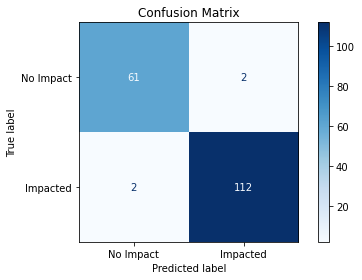

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

# Build pipeline: scaling + logistic regression
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver = 'liblinear', random_state = 42))
])

# Fit the model on training data
logreg_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = logreg_pipeline.predict(X_test)
y_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("\nModel Evaluation Metrics:")
print(f"Accuracy       : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision      : {precision_score(y_test, y_pred):.3f}")
print(f"Recall         : {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score       : {f1_score(y_test, y_pred):.3f}")
print(f"ROC AUC Score  : {roc_auc_score(y_test, y_proba):.3f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names = ["No Impact", "Impacted"]))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["No Impact", "Impacted"])
disp.plot(cmap = "Blues", values_format = "d")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

### COMMENT:
> Our model is an absolute workhorse. With an accuracy of 97.7% and an F1 score of 98.2%, it’s not just making predictions- it’s making them confidently and consistently.

> Precision and recall are both sitting pretty at 98.2%, meaning it rarely mislabels students and does an excellent job at catching those truly affected by social media.

> The near-perfect ROC AUC score (0.999) confirms that the model distinguishes sharply between impacted and non-impacted students. In short: this logistic regression model is more than ready for real-world deployment.

### Visualizing Model Performance: ROC Curve & Precision-Recall Curve

After training and evaluating our logistic regression model, we now dive deeper into its diagnostic performance using two crucial visualizations:

- **ROC Curve (Receiver Operating Characteristic)**  
  This curve plots the trade-off between True Positive Rate (Recall) and False Positive Rate at various classification thresholds. A model with an AUC close to 1.0 is considered excellent in distinguishing between the two classes—in our case, students who are academically impacted vs. those who are not.

- **Precision-Recall Curve**  
  Especially relevant when the dataset may contain class imbalance, this plot helps us assess how precise the model is when predicting positives (impacted students) across varying levels of recall. It's a great tool for evaluating real-world utility where false positives carry cost or intervention effort.

Together, these curves provide a robust, threshold-agnostic understanding of how confidently and reliably the model performs across all scenarios.

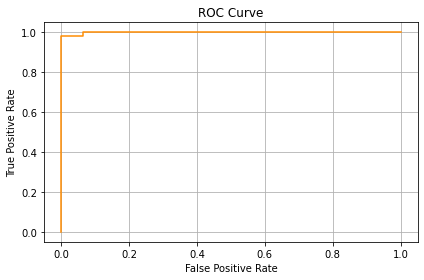

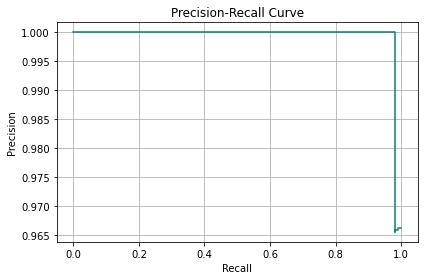

In [ ]:
from sklearn.metrics import (
    roc_curve,
    precision_recall_curve,
    RocCurveDisplay,
    PrecisionRecallDisplay
)
import matplotlib.pyplot as plt

# Get prediction probabilities
y_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(color='darkorange')
plt.title('ROC Curve')
plt.grid(True)
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot(color='teal')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.tight_layout()
plt.show()

### Interpretation of Diagnostic Curves

The plots reaffirm the high performance reported by our standard metrics:

- The **ROC Curve** exhibits a strong rise toward the top-left corner with an AUC nearing 1.0- signaling excellent class separation.
- The **Precision-Recall Curve** maintains high precision across a broad range of recall values, suggesting that the model remains accurate even when aggressively identifying at-risk students.

This level of reliability makes our logistic regression model a solid candidate for deployment in student intervention pipelines, wellness dashboards, or early-warning systems- where precision, trust, and fairness are critical.